In [1]:
pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/06/6a/09e3cb9864118337c0f3c2a0dc5add6b642e9f672665062e186d67ba992d/shap-0.46.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached shap-0.46.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (24 kB)
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/57/03/2b4245b05b71c0cee667e6a0b51606dfa7f4157c9093d71c6b208385a611/numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata
  Using cached numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux

In [3]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/4e/19/1b928cad70a4e1a3e2c37d5417ca2182510f2451eaadb6c91cd9ec692cae/lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl.metadata
  Using cached lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl.metadata (17 kB)
Using cached lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl (3.6 MB)

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV, cross_val_predict
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from IPython.display import display

# For the evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
file_path = 'compas-scores-two-years.csv'
df = pd.read_csv(file_path)

print(df.head())

   id                name   first         last compas_screening_date   sex  \
0   1    miguel hernandez  miguel    hernandez            2013-08-14  Male   
1   3         kevon dixon   kevon        dixon            2013-01-27  Male   
2   4            ed philo      ed        philo            2013-04-14  Male   
3   5         marcu brown   marcu        brown            2013-01-13  Male   
4   6  bouthy pierrelouis  bouthy  pierrelouis            2013-03-26  Male   

          dob  age          age_cat              race  ...  v_decile_score  \
0  1947-04-18   69  Greater than 45             Other  ...               1   
1  1982-01-22   34          25 - 45  African-American  ...               1   
2  1991-05-14   24     Less than 25  African-American  ...               3   
3  1993-01-21   23     Less than 25  African-American  ...               6   
4  1973-01-22   43          25 - 45             Other  ...               1   

   v_score_text  v_screening_date  in_custody  out_custody  pr

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [7]:
df.describe()

id          age  juv_fel_count  decile_score  juv_misd_count  \
count   7214.000000  7214.000000    7214.000000   7214.000000     7214.000000   
mean    5501.255753    34.817993       0.067230      4.509565        0.090934   
std     3175.706870    11.888922       0.473972      2.856396        0.485239   
min        1.000000    18.000000       0.000000      1.000000        0.000000   
25%     2735.250000    25.000000       0.000000      2.000000        0.000000   
50%     5509.500000    31.000000       0.000000      4.000000        0.000000   
75%     8246.500000    42.000000       0.000000      7.000000        0.000000   
max    11001.000000    96.000000      20.000000     10.000000       13.000000   

       juv_other_count  priors_count  days_b_screening_arrest  \
count      7214.000000   7214.000000              6907.000000   
mean          0.109371      3.472415                 3.304763   
std           0.501586      4.882538                75.809505   
min           0.000000      0.000000              -414.000000   
25%           0.000000      0.000000                -1.000000   
50%           0.000000      2.000000                -1.000000   
75%           0.000000      5.000000                 0.000000   
max          17.000000     38.000000              1057.000000   

       c_days_from_compas     is_recid  r_days_from_arrest  violent_recid  \
count         7192.000000  7214.000000         2316.000000            0.0   
mean            57.731368     0.481148           20.269430            NaN   
std            329.740215     0.499679           74.871668            NaN   
min              0.000000     0.000000           -1.000000            NaN   
25%              1.000000     0.000000            0.000000            NaN   
50%              1.000000     0.000000            0.000000            NaN   
75%              2.000000     1.000000            1.000000            NaN   
max           9485.000000     1.000000          993.000000            NaN   

       is_violent_recid  decile_score.1  v_decile_score  priors_count.1  \
count       7214.000000     7214.000000     7214.000000     7214.000000   
mean           0.113529        4.509565        3.691849        3.472415   
std            0.317261        2.856396        2.510148        4.882538   
min            0.000000        1.000000        1.000000        0.000000   
25%            0.000000        2.000000        1.000000        0.000000   
50%            0.000000        4.000000        3.000000        2.000000   
75%            0.000000        7.000000        5.000000        5.000000   
max            1.000000       10.000000       10.000000       38.000000   

             start          end        event  two_year_recid  
count  7214.000000  7214.000000  7214.000000     7214.000000  
mean     11.465068   553.436651     0.382867        0.450652  
std      46.954563   399.020583     0.486120        0.497593  
min       0.000000     0.000000     0.000000        0.000000  
25%       0.000000   148.250000     0.000000        0.000000  
50%       0.000000   530.500000     0.000000        0.000000  
75%       1.000000   914.000000     1.000000        1.000000  
max     937.000000  1186.000000     1.000000        1.000000

In [8]:
# Select the columns you want to compare
column1 = 'priors_count'
column2 = 'priors_count.1'

# Check if the columns are identical
are_identical = df[column1].equals(df[column2])

# Print the result
print(f"Are the columns '{column1}' and '{column2}' identical? {are_identical}")

Are the columns 'priors_count' and 'priors_count.1' identical? True


In [9]:
df = df[[ 'sex', 'age', 'race', 'priors_count', 'juv_fel_count', 'juv_misd_count', 'two_year_recid']]
print(df)

         sex  age              race  priors_count  juv_fel_count  \
0       Male   69             Other             0              0   
1       Male   34  African-American             0              0   
2       Male   24  African-American             4              0   
3       Male   23  African-American             1              0   
4       Male   43             Other             2              0   
...      ...  ...               ...           ...            ...   
7209    Male   23  African-American             0              0   
7210    Male   23  African-American             0              0   
7211    Male   57             Other             0              0   
7212  Female   33  African-American             3              0   
7213  Female   23          Hispanic             2              0   

      juv_misd_count  two_year_recid  
0                  0               0  
1                  0               1  
2                  0               1  
3                  1       

In [10]:
# Feature Engineering create new variables
df['misdemeanor_index'] = df['juv_misd_count'] / df['priors_count'].replace(0, np.nan)*100
df['misdemeanor_index'].fillna(0, inplace=True)

df['felony_index'] = df['juv_fel_count'] / df['priors_count'].replace(0, np.nan)*100
df['felony_index'].fillna(0, inplace=True)

In [11]:
df.describe()

age  priors_count  juv_fel_count  juv_misd_count  \
count  7214.000000   7214.000000    7214.000000     7214.000000   
mean     34.817993      3.472415       0.067230        0.090934   
std      11.888922      4.882538       0.473972        0.485239   
min      18.000000      0.000000       0.000000        0.000000   
25%      25.000000      0.000000       0.000000        0.000000   
50%      31.000000      2.000000       0.000000        0.000000   
75%      42.000000      5.000000       0.000000        0.000000   
max      96.000000     38.000000      20.000000       13.000000   

       two_year_recid  misdemeanor_index  felony_index  
count     7214.000000        7214.000000   7214.000000  
mean         0.450652           2.019541      1.561238  
std          0.497593          10.972194     10.545823  
min          0.000000           0.000000      0.000000  
25%          0.000000           0.000000      0.000000  
50%          0.000000           0.000000      0.000000  
75%          1.000000           0.000000      0.000000  
max          1.000000         100.000000    150.000000

There are no missing values in any column.
Outliers in column 'age':
         sex  age              race  priors_count  juv_fel_count  \
0       Male   69             Other             0              0   
93      Male   71  African-American            12              0   
179     Male   78         Caucasian             1              0   
289     Male   70         Caucasian             1              0   
355     Male   69         Caucasian             0              0   
...      ...  ...               ...           ...            ...   
6459    Male   77  African-American             1              0   
6869    Male   71         Caucasian             3              0   
7032    Male   74         Caucasian             0              0   
7046  Female   69         Caucasian             5              0   
7117    Male   74         Caucasian             2              0   

      juv_misd_count  two_year_recid  misdemeanor_index  felony_index  
0                  0               0      

/tmp/ipykernel_76/4261824673.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Blues')
/tmp/ipykernel_76/4261824673.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Blues')
/tmp/ipykernel_76/4261824673.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Blues')
/tmp/ipykernel_76/4261824673.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the sam

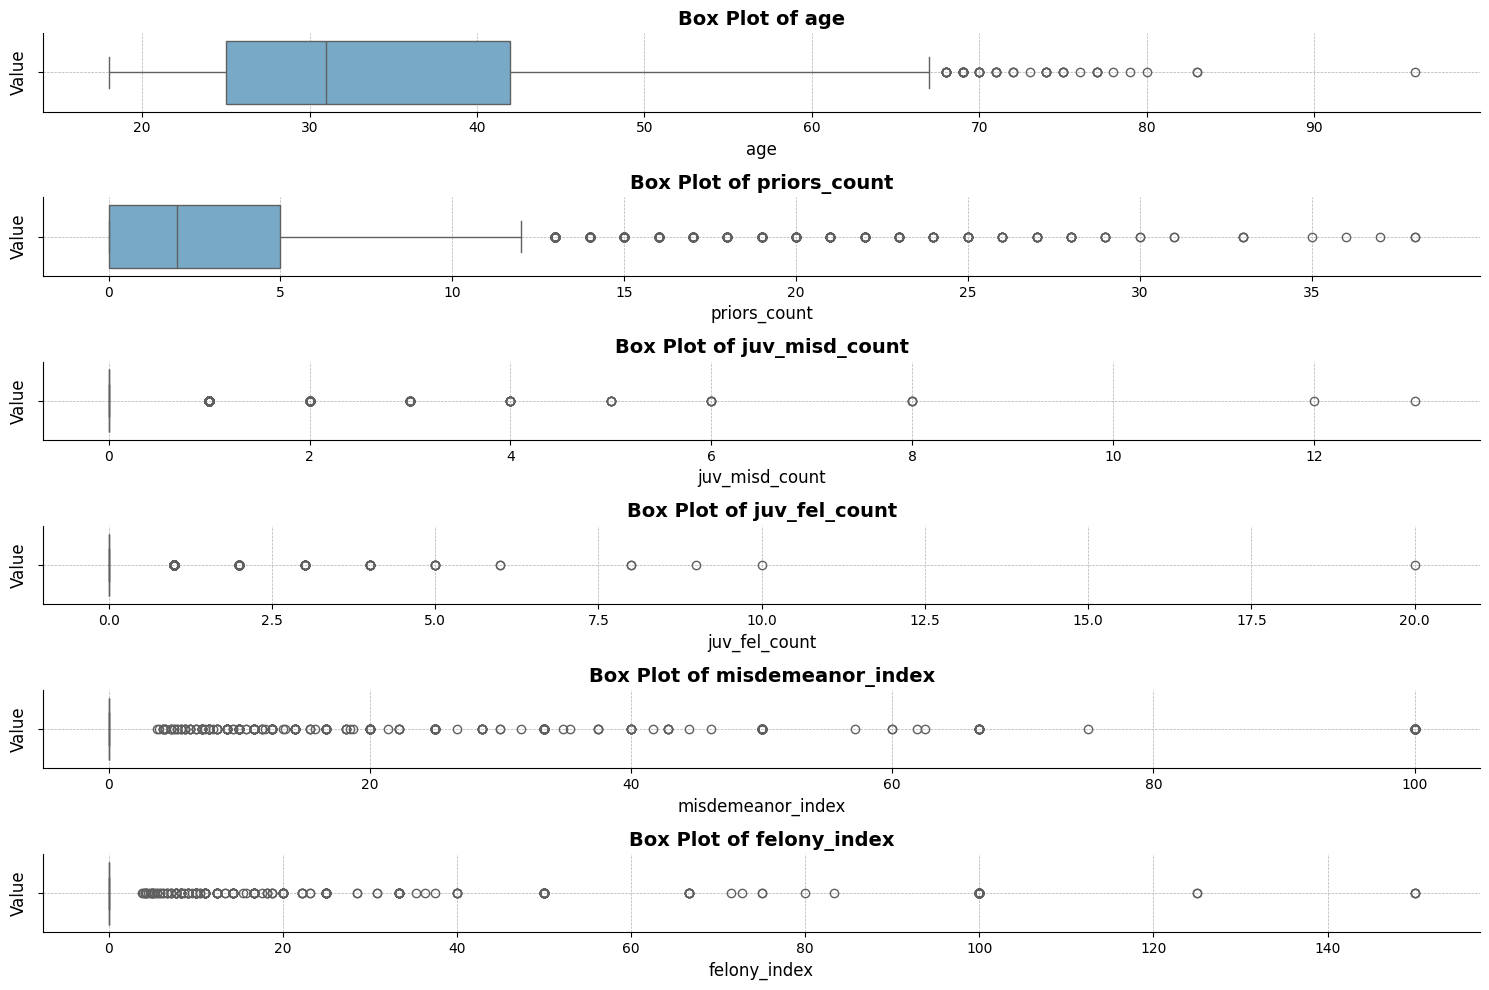

In [12]:
# Identify Missing Values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if missing_values.empty:
    print("There are no missing values in any column.")
else:
    print("Missing values in each column:")
    print(missing_values)

# Identify Outliers
# Define a function to identify outliers using the IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Apply the function to identify outliers for each numerical column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers = {col: identify_outliers(df, col) for col in numerical_columns}

# Print outliers for each column
for col, outlier_data in outliers.items():
    print(f"Outliers in column '{col}':")
    if not outlier_data.empty:
        print(outlier_data)
    else:
        print("No outliers detected.")
    print()

# Visualize outliers using box plots
numerical_columns = ['age', 'priors_count', 'juv_misd_count', 'juv_fel_count', 'misdemeanor_index', 'felony_index']

# Create box plots in a report-friendly style
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[column], palette='Blues')
    plt.title(f'Box Plot of {column}', fontsize=14, weight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    
# Remove top and right spines for a cleaner look
sns.despine()

# Adjust layout for better fit
plt.tight_layout()

# Save the figure
plt.savefig('box_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [13]:
df.head()

sex  age              race  priors_count  juv_fel_count  juv_misd_count  \
0  Male   69             Other             0              0               0   
1  Male   34  African-American             0              0               0   
2  Male   24  African-American             4              0               0   
3  Male   23  African-American             1              0               1   
4  Male   43             Other             2              0               0   

   two_year_recid  misdemeanor_index  felony_index  
0               0                0.0           0.0  
1               1                0.0           0.0  
2               1                0.0           0.0  
3               0              100.0           0.0  
4               0                0.0           0.0

In [14]:
# Create saperate dataframe (Orignial VS log transformation)
df_log = df.copy()

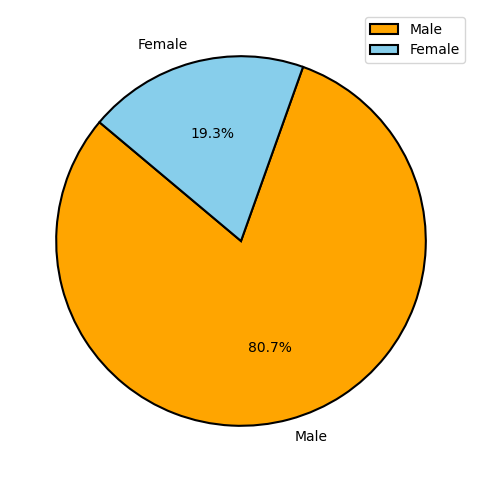

In [15]:
# Aggregate the data by sex
sex_counts = df['sex'].value_counts()

# Define a custom color palette
custom_palette = {
    'Male': 'orange',
    'Female': 'skyblue' 
}

# Extract the data for the pie chart
labels = sex_counts.index
sizes = sex_counts.values
colors = [custom_palette[label] for label in labels]

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
plt.legend()

# Save the figure
plt.savefig('sex_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [16]:
race_counts = df['race'].value_counts()
race_description = df['race'].describe()

print('Unique race groups and their counts')
print(race_counts)
print("\nDescriptive statistics of the 'race' column:")
print(race_description)

Unique race groups and their counts
African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

Descriptive statistics of the 'race' column:
count                 7214
unique                   6
top       African-American
freq                  3696
Name: race, dtype: object


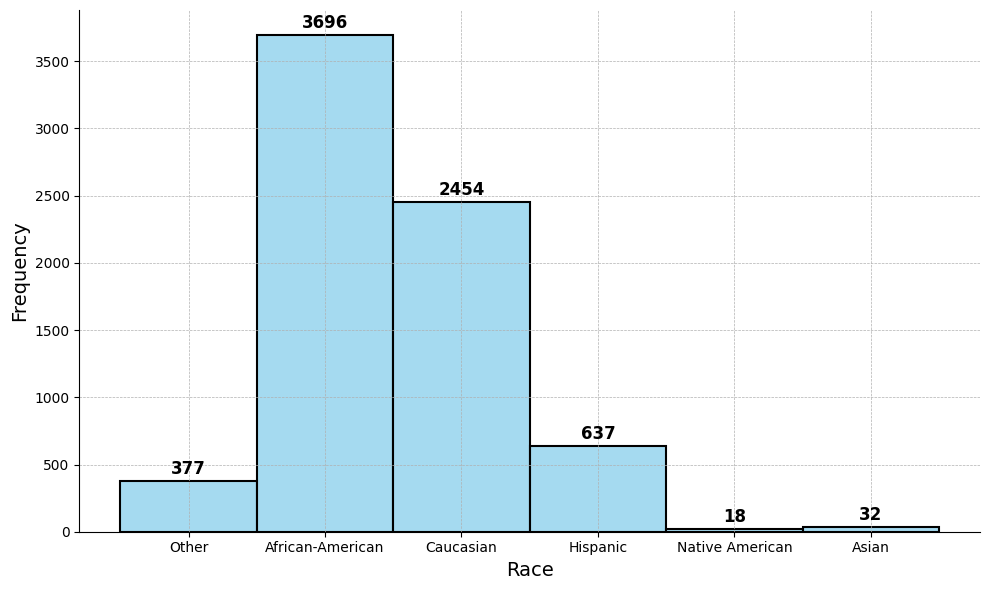

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['race'], kde=False, color='skyblue', edgecolor='black', linewidth=1.5)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)

# Add text annotations
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords="offset points", ha='center', fontsize=12, weight='bold')
    
# Remove top and right spines for a cleaner look
sns.despine()

# Adjust layout for better fit
plt.tight_layout()

# Save the figure
plt.savefig('race_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

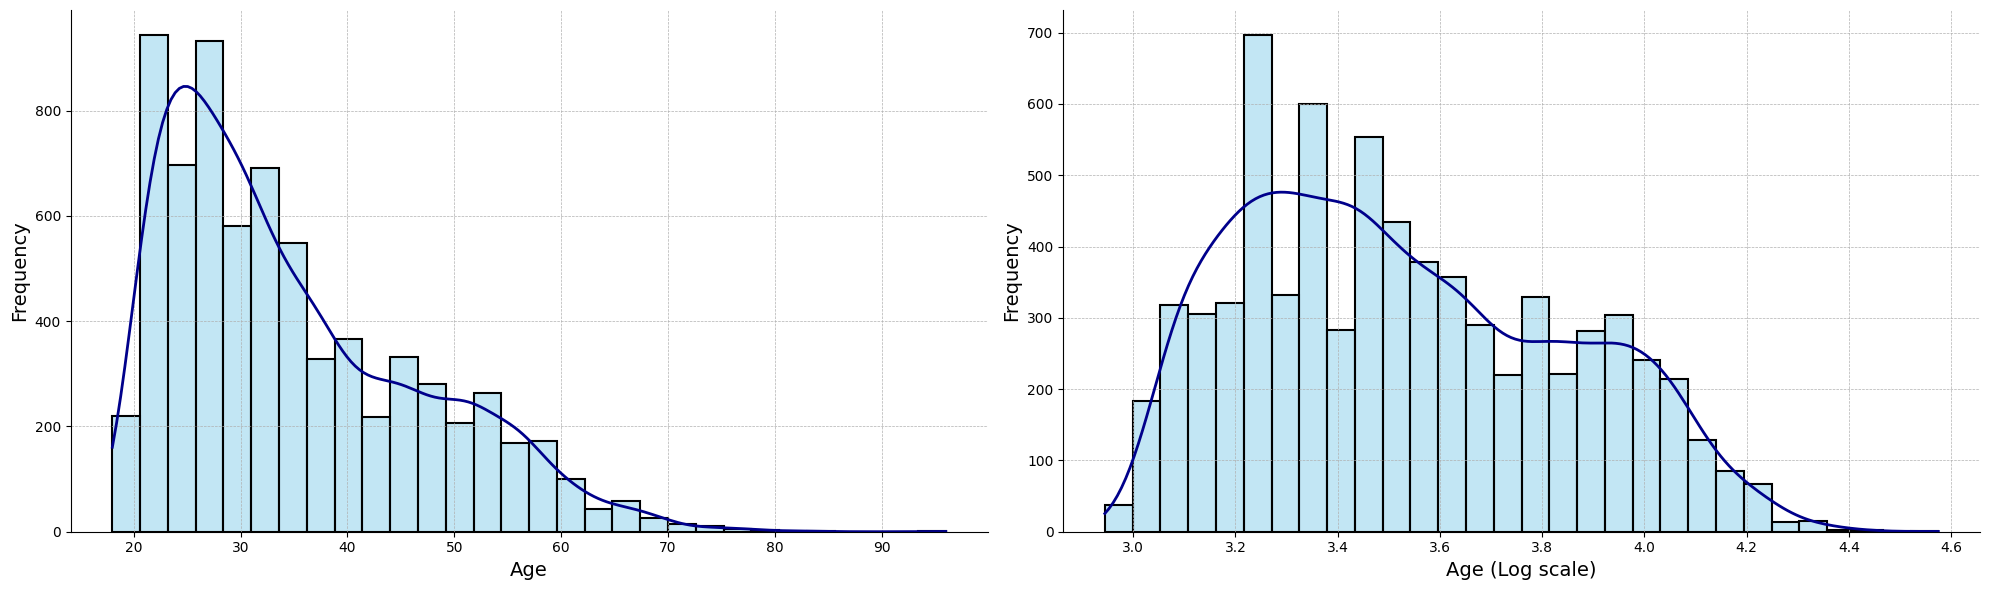

In [18]:
# Apply log transformation to 'age'
df_log['log_age'] = np.log1p(df['age'])

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Set a common color for the histogram and a darker color for the KDE line
hist_color = 'skyblue'
kde_color = 'darkblue'

sns.histplot(df['age'], bins=30, kde=True, color=hist_color, edgecolor='black', linewidth=1.5, ax=axes[0])
axes[0].set_xlabel('Age', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(True, linestyle='--', linewidth=0.5)

# Remove top and right spines for a cleaner look
sns.despine(ax=axes[0])

# Plot the log-transformed age distribution
sns.histplot(df_log['log_age'], bins=30, kde=True, color=hist_color, edgecolor='black', linewidth=1.5,  ax=axes[1])
axes[1].set_xlabel('Age (Log scale)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].grid(True, linestyle='--', linewidth=0.5)

# Adjust KDE line color and width
for line in axes[0].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

for line in axes[1].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

# Remove top and right spines for a cleaner look
sns.despine(ax=axes[1])

# Adjust layout for better fit
plt.tight_layout()

# Save the figure
plt.savefig('age_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

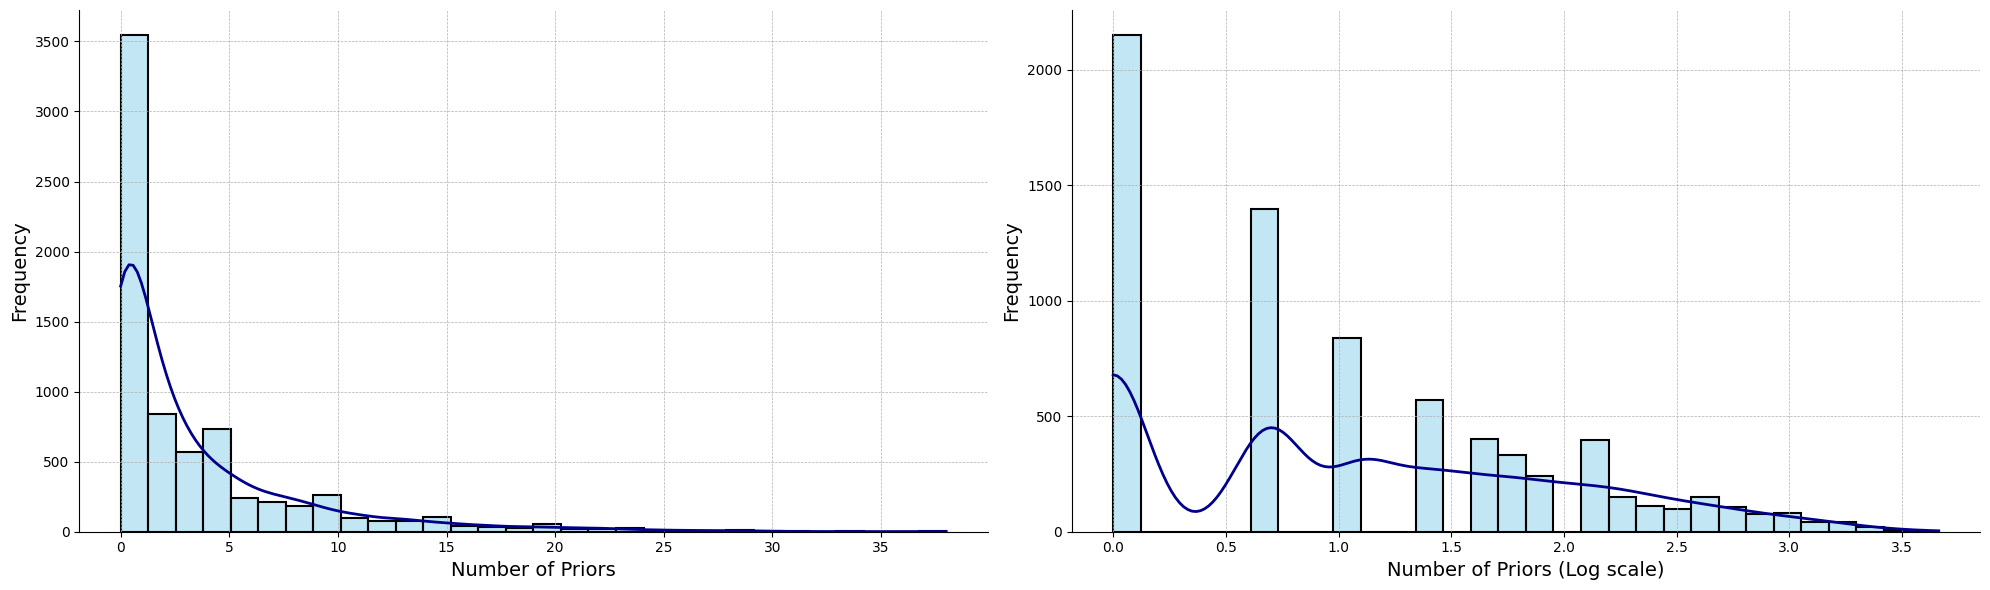

In [19]:
# Apply log transformation to 'Number of Priors'
df_log['log_priors'] = np.log1p(df['priors_count'])

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Set a common color for the histogram and a darker color for the KDE line
hist_color = 'skyblue'
kde_color = 'darkblue'

sns.histplot(df['priors_count'], bins=30, kde=True, color=hist_color, edgecolor='black', linewidth=1.5, ax=axes[0])
axes[0].set_xlabel('Number of Priors', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(True, linestyle='--', linewidth=0.5)

# Remove top and right spines for a cleaner look
sns.despine(ax=axes[0])

# Plot the log-transformed age distribution
sns.histplot(df_log['log_priors'], bins=30, kde=True, color=hist_color, edgecolor='black', linewidth=1.5,  ax=axes[1])
axes[1].set_xlabel('Number of Priors (Log scale)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].grid(True, linestyle='--', linewidth=0.5)

# Adjust KDE line color and width
for line in axes[0].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

for line in axes[1].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

# Remove top and right spines for a cleaner look
sns.despine(ax=axes[1])

# Adjust layout for better fit
plt.tight_layout()

# Save the figure
plt.savefig('priors_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [20]:
misd_counts = df['juv_misd_count'].value_counts()
misd_description = df['juv_misd_count'].describe()

print('Misdemeanor')
print(misd_counts)
print("\nDescriptive statistics of the 'Misdemeanor' column:")
print(misd_description)

Misdemeanor
0     6799
1      291
2       72
3       29
4        9
5        5
6        4
8        3
12       1
13       1
Name: juv_misd_count, dtype: int64

Descriptive statistics of the 'Misdemeanor' column:
count    7214.000000
mean        0.090934
std         0.485239
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        13.000000
Name: juv_misd_count, dtype: float64


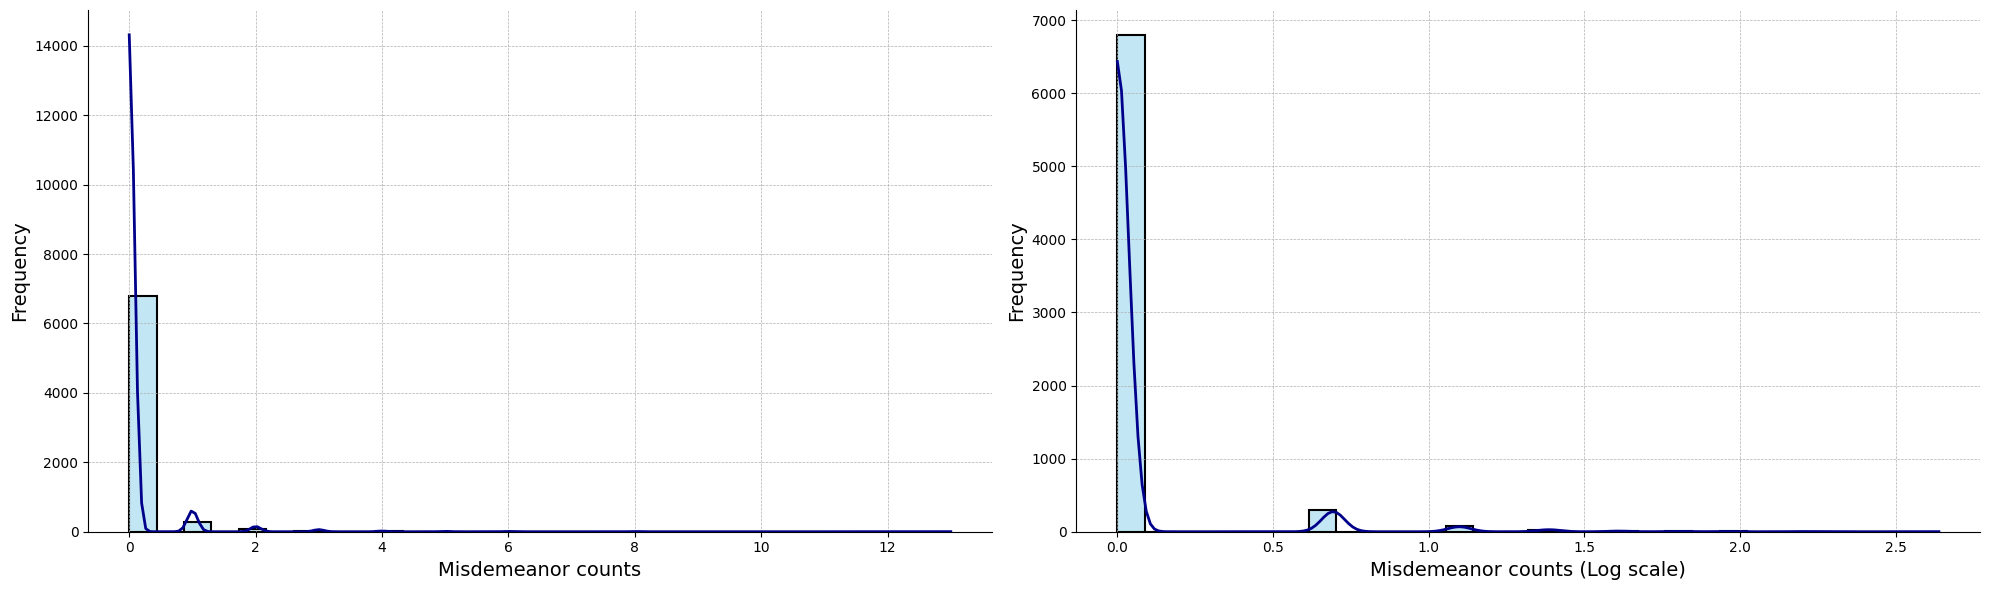

In [21]:
# Apply log transformation to 'Misdemeanor'
df_log['log_mis'] = np.log1p(df['juv_misd_count'])

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Set a common color for the histogram and a darker color for the KDE line
hist_color = 'skyblue'
kde_color = 'darkblue'

sns.histplot(df['juv_misd_count'], bins=30, kde=True, color=hist_color, edgecolor='black', linewidth=1.5, ax=axes[0])
axes[0].set_xlabel('Misdemeanor counts', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(True, linestyle='--', linewidth=0.5)

# Remove top and right spines for a cleaner look
sns.despine(ax=axes[0])

# Plot the log-transformed age distribution
sns.histplot(df_log['log_mis'], bins=30, kde=True, color=hist_color, edgecolor='black', linewidth=1.5,  ax=axes[1])
axes[1].set_xlabel('Misdemeanor counts (Log scale)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].grid(True, linestyle='--', linewidth=0.5)

# Adjust KDE line color and width
for line in axes[0].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

for line in axes[1].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

# Remove top and right spines for a cleaner look
sns.despine(ax=axes[1])

# Adjust layout for better fit
plt.tight_layout()

# Save the figure
plt.savefig('mis_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [22]:
fel_counts = df['juv_fel_count'].value_counts()
fel_description = df['juv_fel_count'].describe()

print('Felony')
print(fel_counts)
print("\nDescriptive statistics of the 'Felony' column:")
print(fel_description)

Felony
0     6932
1      189
2       51
3       18
4       12
5        5
8        2
6        2
9        1
20       1
10       1
Name: juv_fel_count, dtype: int64

Descriptive statistics of the 'Felony' column:
count    7214.000000
mean        0.067230
std         0.473972
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: juv_fel_count, dtype: float64


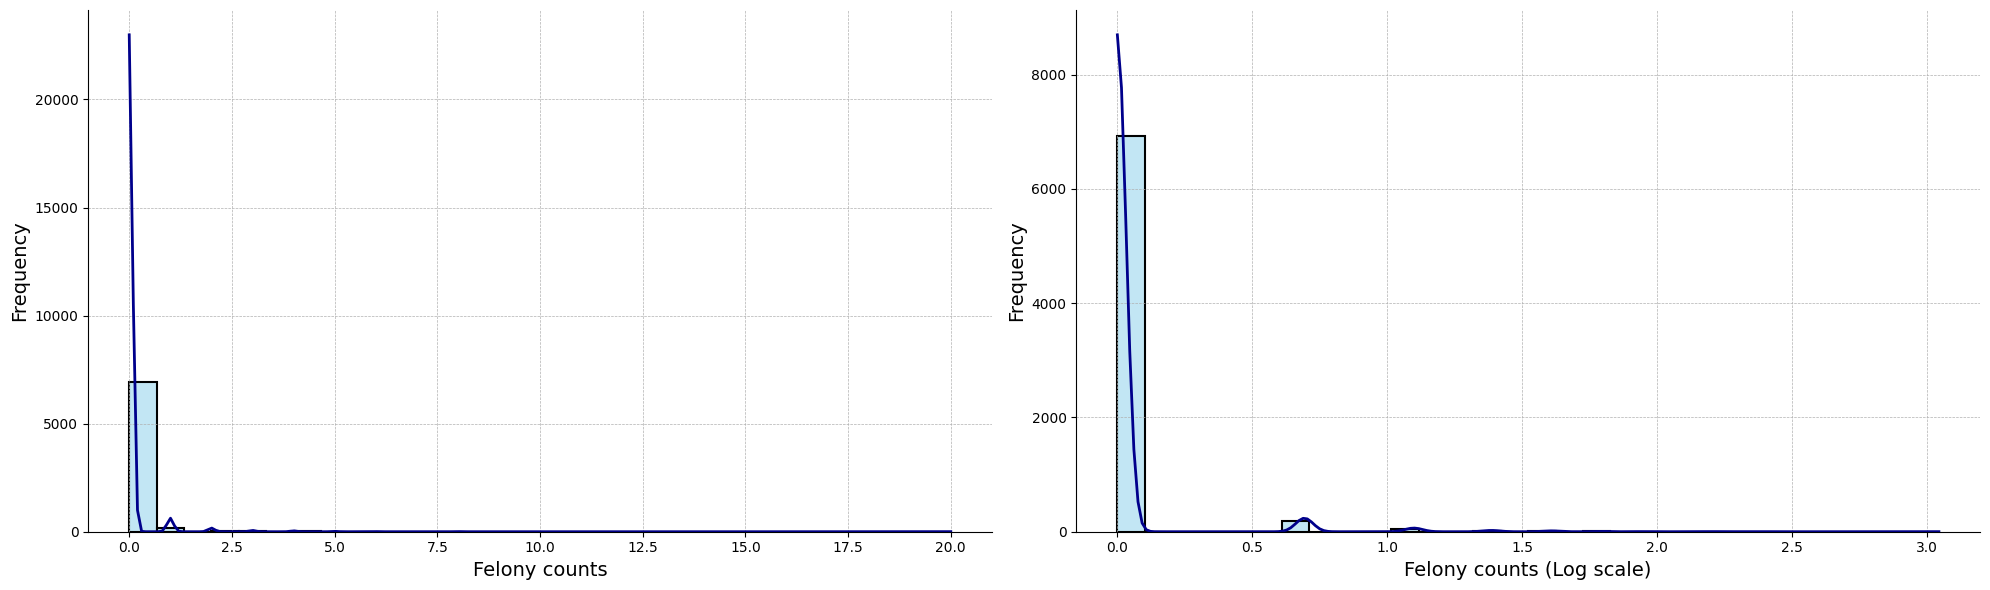

In [23]:
# Apply log transformation to 'Felony'
df_log['log_fel'] = np.log1p(df['juv_fel_count'])

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Set a common color for the histogram and a darker color for the KDE line
hist_color = 'skyblue'
kde_color = 'darkblue'

sns.histplot(df['juv_fel_count'], bins=30, kde=True, color=hist_color, edgecolor='black', linewidth=1.5, ax=axes[0])
axes[0].set_xlabel('Felony counts', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(True, linestyle='--', linewidth=0.5)

# Remove top and right spines for a cleaner look
sns.despine(ax=axes[0])

# Plot the log-transformed age distribution
sns.histplot(df_log['log_fel'], bins=30, kde=True, color=hist_color, edgecolor='black', linewidth=1.5,  ax=axes[1])
axes[1].set_xlabel('Felony counts (Log scale)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].grid(True, linestyle='--', linewidth=0.5)

# Adjust KDE line color and width
for line in axes[0].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

for line in axes[1].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

# Remove top and right spines for a cleaner look
sns.despine(ax=axes[1])

# Adjust layout for better fit
plt.tight_layout()

# Save the figure
plt.savefig('fel_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

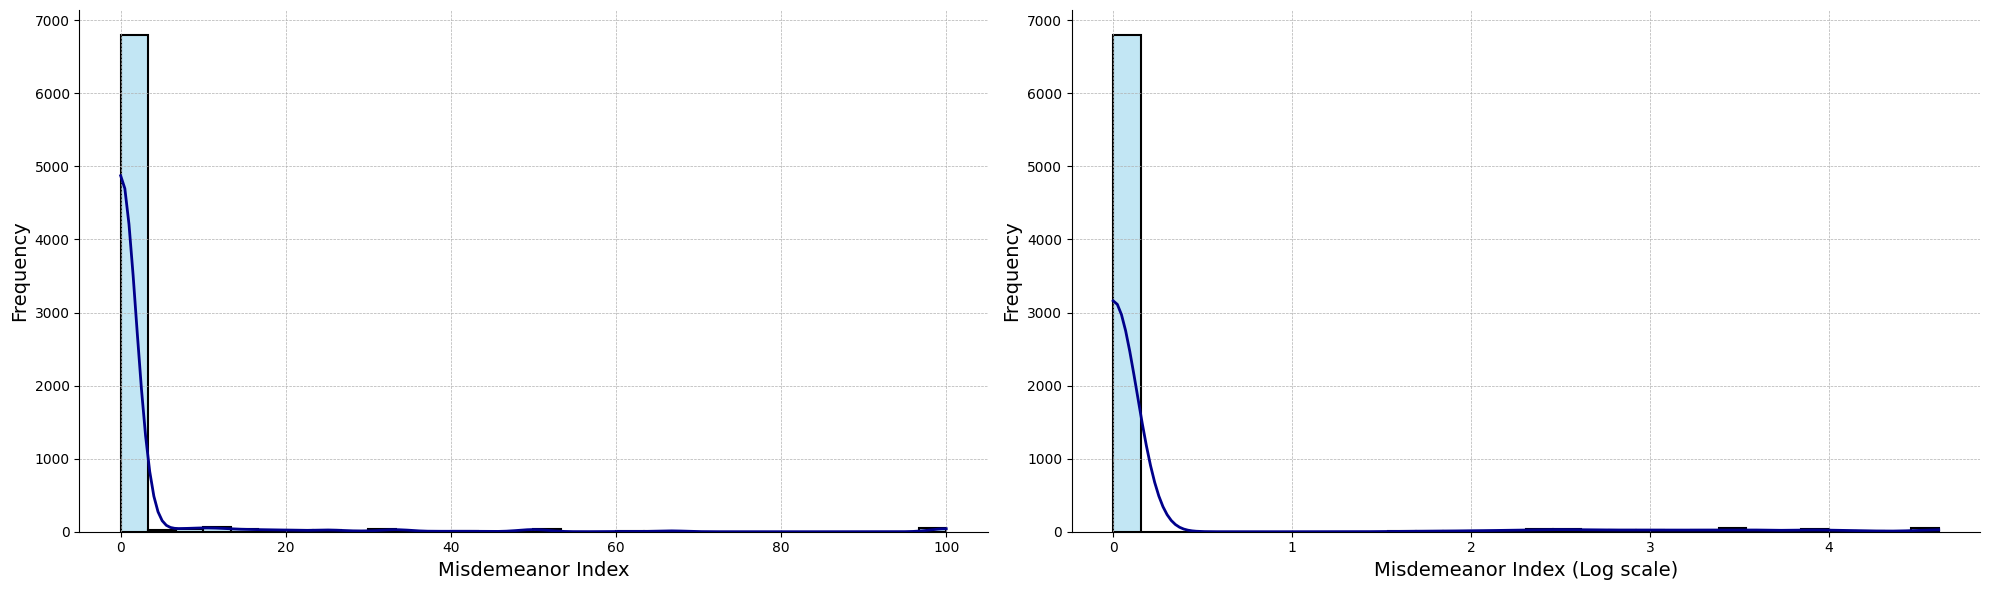

In [24]:
# Apply log transformation to 'Misdemeanor Ratio'
df_log['log_misi'] = np.log1p(df['misdemeanor_index'])

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Set a common color for the histogram and a darker color for the KDE line
hist_color = 'skyblue'
kde_color = 'darkblue'

sns.histplot(df['misdemeanor_index'], bins=30, kde=True, color=hist_color, edgecolor='black', linewidth=1.5, ax=axes[0])
axes[0].set_xlabel('Misdemeanor Index', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(True, linestyle='--', linewidth=0.5)

# Remove top and right spines for a cleaner look
sns.despine(ax=axes[0])

# Plot the log-transformed age distribution
sns.histplot(df_log['log_misi'], bins=30, kde=True, color=hist_color, edgecolor='black', linewidth=1.5,  ax=axes[1])
axes[1].set_xlabel('Misdemeanor Index (Log scale)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].grid(True, linestyle='--', linewidth=0.5)

# Adjust KDE line color and width
for line in axes[0].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

for line in axes[1].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

# Remove top and right spines for a cleaner look
sns.despine(ax=axes[1])

# Adjust layout for better fit
plt.tight_layout()

# Save the figure
plt.savefig('misi_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

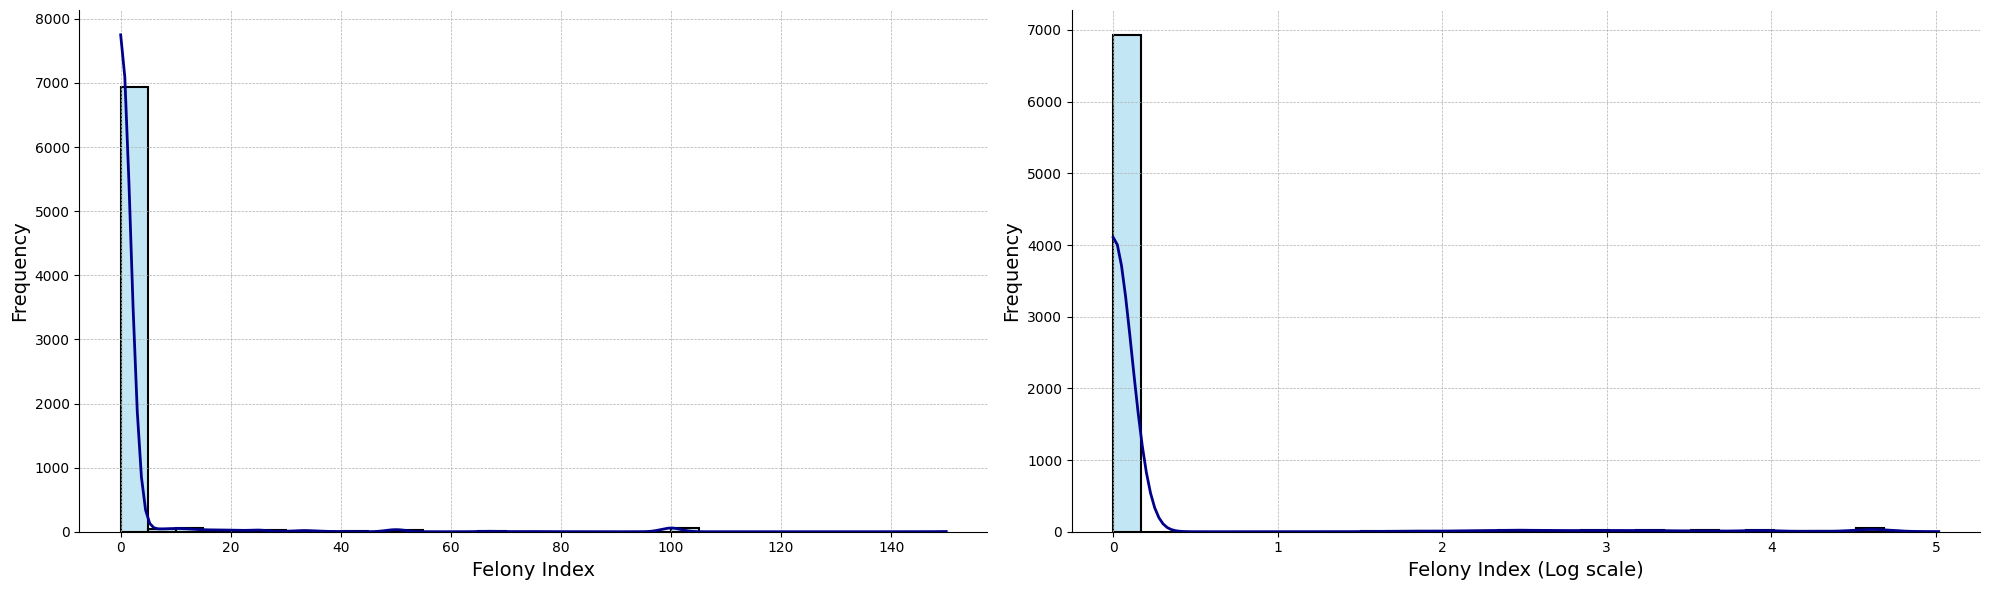

In [25]:
# Apply log transformation to 'Felony Ratio'
df_log['log_feli'] = np.log1p(df['felony_index'])

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Set a common color for the histogram and a darker color for the KDE line
hist_color = 'skyblue'
kde_color = 'darkblue'

sns.histplot(df['felony_index'], bins=30, kde=True, color=hist_color, edgecolor='black', linewidth=1.5, ax=axes[0])
axes[0].set_xlabel('Felony Index', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(True, linestyle='--', linewidth=0.5)

# Remove top and right spines for a cleaner look
sns.despine(ax=axes[0])

# Plot the log-transformed age distribution
sns.histplot(df_log['log_feli'], bins=30, kde=True, color=hist_color, edgecolor='black', linewidth=1.5,  ax=axes[1])
axes[1].set_xlabel('Felony Index (Log scale)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].grid(True, linestyle='--', linewidth=0.5)

# Adjust KDE line color and width
for line in axes[0].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

for line in axes[1].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

# Remove top and right spines for a cleaner look
sns.despine(ax=axes[1])

# Adjust layout for better fit
plt.tight_layout()

# Save the figure
plt.savefig('feli_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [26]:
df_log.drop(['age', 'priors_count', 'juv_fel_count', 'juv_misd_count', 'misdemeanor_index', 'felony_index'], axis=1, inplace=True)
df_log.head()

sex              race  two_year_recid   log_age  log_priors   log_mis  \
0  Male             Other               0  4.248495    0.000000  0.000000   
1  Male  African-American               1  3.555348    0.000000  0.000000   
2  Male  African-American               1  3.218876    1.609438  0.000000   
3  Male  African-American               0  3.178054    0.693147  0.693147   
4  Male             Other               0  3.784190    1.098612  0.000000   

   log_fel  log_misi  log_feli  
0      0.0  0.000000       0.0  
1      0.0  0.000000       0.0  
2      0.0  0.000000       0.0  
3      0.0  4.615121       0.0  
4      0.0  0.000000       0.0

In [27]:
df.head()

sex  age              race  priors_count  juv_fel_count  juv_misd_count  \
0  Male   69             Other             0              0               0   
1  Male   34  African-American             0              0               0   
2  Male   24  African-American             4              0               0   
3  Male   23  African-American             1              0               1   
4  Male   43             Other             2              0               0   

   two_year_recid  misdemeanor_index  felony_index  
0               0                0.0           0.0  
1               1                0.0           0.0  
2               1                0.0           0.0  
3               0              100.0           0.0  
4               0                0.0           0.0

/tmp/ipykernel_76/1085149058.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


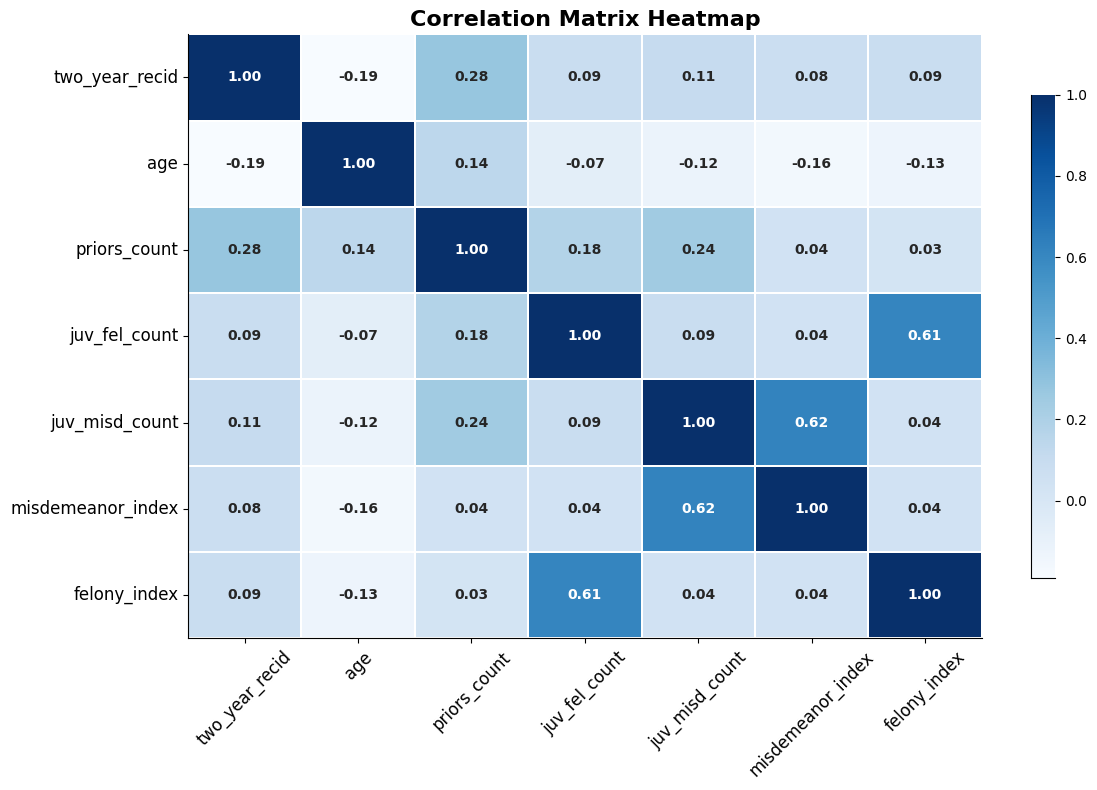

In [28]:
# Calculate the correlation matrix of original data
corr_matrix = df.corr()

# Desired new order of columns, with 'two_year_recid' moved to the top
new_order = ['two_year_recid'] + [col for col in corr_matrix.columns if col != 'two_year_recid']

# Reorder the correlation matrix
corr_matrix = corr_matrix.loc[new_order, new_order]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='Blues',  # Use a lighter color palette
    annot_kws={'size': 10, 'weight': 'bold'},  # Adjust annotation style
    cbar_kws={'shrink': 0.8},  # Adjust color bar size
    linewidths=0.3,  # Thinner lines for a cleaner look
    linecolor='white'  # Line color between cells
)

# Add title and labels for a report-styled look
plt.title('Correlation Matrix Heatmap', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Remove top and right spines
sns.despine()

# Adjust layout for better fit
plt.tight_layout()

# Save the figure
plt.savefig('correlattion_heatmapdistribution.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_76/2579430490.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_log.corr()


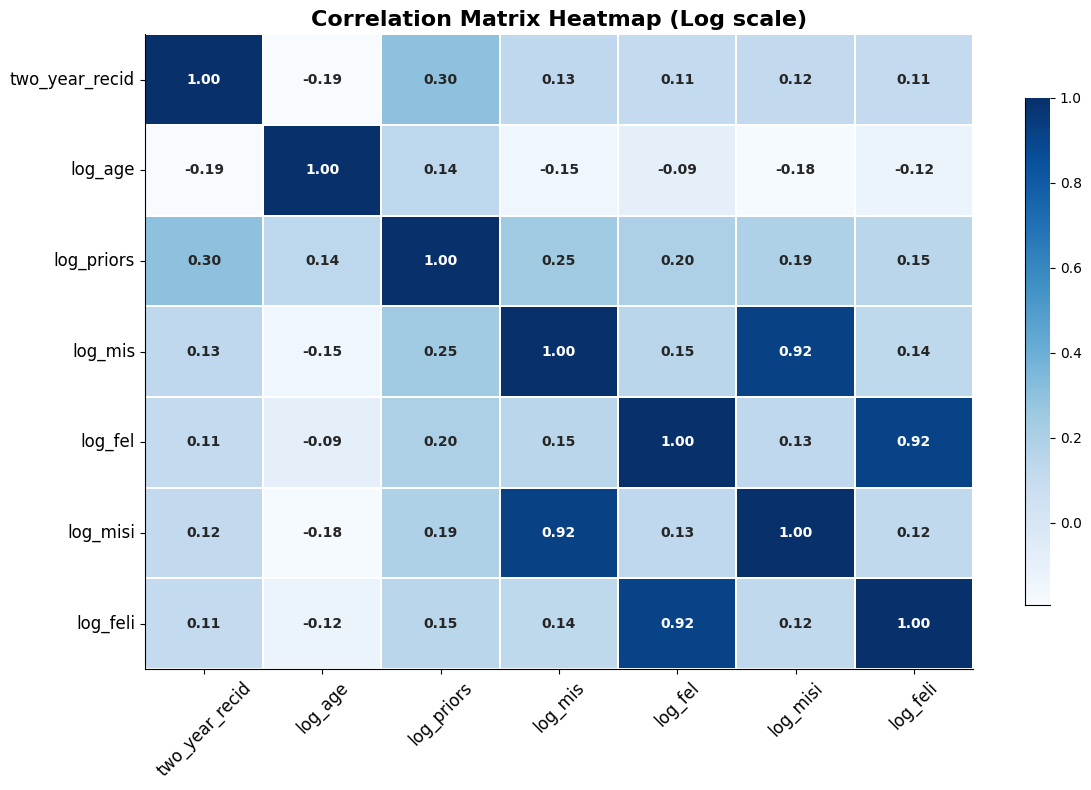

In [29]:
# Calculate the correlation matrix of log data
corr_matrix = df_log.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='Blues',  # Use a lighter color palette
    annot_kws={'size': 10, 'weight': 'bold'},  # Adjust annotation style
    cbar_kws={'shrink': 0.8},  # Adjust color bar size
    linewidths=0.3,  # Thinner lines for a cleaner look
    linecolor='white'  # Line color between cells
)

# Add title and labels for a report-styled look
plt.title('Correlation Matrix Heatmap (Log scale)', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Remove top and right spines
sns.despine()

# Adjust layout for better fit
plt.tight_layout()

# Save the figure
plt.savefig('log_correlattion_heatmapdistribution.png', dpi=300, bbox_inches='tight')
plt.show()

Binary Variable (Two year recid):

Positive Correlation: A positive value indicates that the binary variable (when 1) is associated with higher values of the continuous variable.

Negative Correlation: A negative value indicates that the binary variable (when 1) is associated with lower values of the continuous variable.

Near Zero: Indicates no linear relationship.

## Original data Training

In [30]:
# Separate features and target variable
X = df.drop('two_year_recid', axis=1)
y = df['two_year_recid']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

In [31]:
# function to calculate false positive rate
def calculate_fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fpr = fp / (fp + tn)
    return fpr

In [32]:
# List to store metrics
metrics = []

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Default Parameters

In [33]:
# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Perform cross-validation predictions
log_reg_pred = cross_val_predict(log_reg, X, y, cv=kf)

log_reg_pred_proba = cross_val_predict(log_reg, X, y, cv=kf, method='predict_proba')[:, 1]
log_reg_accuracy = accuracy_score(y, log_reg_pred)
log_reg_fpr = calculate_fpr(y, log_reg_pred)
log_reg_pos_precision = precision_score(y, log_reg_pred, pos_label=1)
log_reg_neg_precision = precision_score(y, log_reg_pred, pos_label=0)
log_reg_recall = recall_score(y, log_reg_pred)
log_reg_roc_auc = roc_auc_score(y, log_reg_pred_proba)
metrics.append([
    'Logistic Regression', log_reg_accuracy, log_reg_fpr, log_reg_pos_precision,
    log_reg_neg_precision, log_reg_recall, log_reg_roc_auc
])

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [34]:
# Initialize the decision tree model with a random state
dt = DecisionTreeClassifier(random_state=42)

# Perform cross-validation predictions
dt_pred = cross_val_predict(dt, X, y, cv=kf)

dt_pred_proba = cross_val_predict(dt, X, y, cv=kf, method='predict_proba')[:, 1]
dt_accuracy = accuracy_score(y, dt_pred)
dt_fpr = calculate_fpr(y, dt_pred)
dt_pos_precision = precision_score(y, dt_pred, pos_label=1)
dt_neg_precision = precision_score(y, dt_pred, pos_label=0)
dt_recall = recall_score(y, dt_pred)
dt_roc_auc = roc_auc_score(y, dt_pred_proba)
metrics.append([
    'Decision Tree', dt_accuracy, dt_fpr, dt_pos_precision, dt_neg_precision,
    dt_recall, dt_roc_auc
])

In [35]:
# Initialize the random forest model with a random state
rf = RandomForestClassifier(random_state=42)

# Perform cross-validation predictions
rf_pred = cross_val_predict(rf, X, y, cv=kf)

rf_pred_proba = cross_val_predict(rf, X, y, cv=kf, method='predict_proba')[:, 1]
rf_accuracy = accuracy_score(y, rf_pred)
rf_fpr = calculate_fpr(y, rf_pred)
rf_pos_precision = precision_score(y, rf_pred, pos_label=1)
rf_neg_precision = precision_score(y, rf_pred, pos_label=0)
rf_recall = recall_score(y, rf_pred)
rf_roc_auc = roc_auc_score(y, rf_pred_proba)
metrics.append([
    'Random Forest', rf_accuracy, rf_fpr, rf_pos_precision, rf_neg_precision,
    rf_recall, rf_roc_auc
])

In [36]:
# Initialize the light gradient boosting model with a random state
lgbm = lgb.LGBMClassifier(random_state=42, verbose=-1)

# Perform cross-validation predictions
lgbm_pred = cross_val_predict(lgbm, X, y, cv=kf)

lgbm_pred_proba = cross_val_predict(lgbm, X, y, cv=kf, method='predict_proba')[:, 1]
lgbm_accuracy = accuracy_score(y, lgbm_pred)
lgbm_fpr = calculate_fpr(y, lgbm_pred)
lgbm_pos_precision = precision_score(y, lgbm_pred, pos_label=1)
lgbm_neg_precision = precision_score(y, lgbm_pred, pos_label=0)
lgbm_recall = recall_score(y, lgbm_pred)
lgbm_roc_auc = roc_auc_score(y, lgbm_pred_proba)
metrics.append([
    'Light Gradient Boosting Machine', lgbm_accuracy, lgbm_fpr, lgbm_pos_precision,
    lgbm_neg_precision, lgbm_recall, lgbm_roc_auc
])

In [37]:
# Initialize the neural network model with a random state
nn = MLPClassifier(random_state=42)

# Perform cross-validation predictions
nn_pred = cross_val_predict(nn, X, y, cv=kf)

nn_pred_proba = cross_val_predict(nn, X, y, cv=kf, method='predict_proba')[:, 1]
nn_accuracy = accuracy_score(y, nn_pred)
nn_fpr = calculate_fpr(y, nn_pred)
nn_pos_precision = precision_score(y, nn_pred, pos_label=1)
nn_neg_precision = precision_score(y, nn_pred, pos_label=0)
nn_recall = recall_score(y, nn_pred)
nn_roc_auc = roc_auc_score(y, nn_pred_proba)
metrics.append([
    'Neural Network', nn_accuracy, nn_fpr, nn_pos_precision, nn_neg_precision,
    nn_recall, nn_roc_auc
])

In [38]:
# Create a DataFrame from the metrics list
df_metrics = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'False Positive Rate',
                                           'Positive Precision', 'Negative Precision', 
                                            'Recall (Sensitivity)', 'ROC AUC'])

# Format the numerical values to 3 decimal places
df_metrics['Accuracy'] = df_metrics['Accuracy'].apply(lambda x: f"{x:.3f}")
df_metrics['False Positive Rate'] = df_metrics['False Positive Rate'].apply(lambda x: f"{x:.3f}")
df_metrics['Positive Precision'] = df_metrics['Positive Precision'].apply(lambda x: f"{x:.3f}")
df_metrics['Negative Precision'] = df_metrics['Negative Precision'].apply(lambda x: f"{x:.3f}")
df_metrics['Recall (Sensitivity)'] = df_metrics['Recall (Sensitivity)'].apply(lambda x: f"{x:.3f}")
df_metrics['ROC AUC'] = df_metrics['ROC AUC'].apply(lambda x: f"{x:.3f}")

# Display the styled DataFrame
display(df_metrics.style.hide(axis='index'))

In [39]:
# Train models on the whole dataset
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Light Gradient Boosting Machine': lgbm,
    'Neural Network': nn
}

for name, model in models.items():
    model.fit(X, y)

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


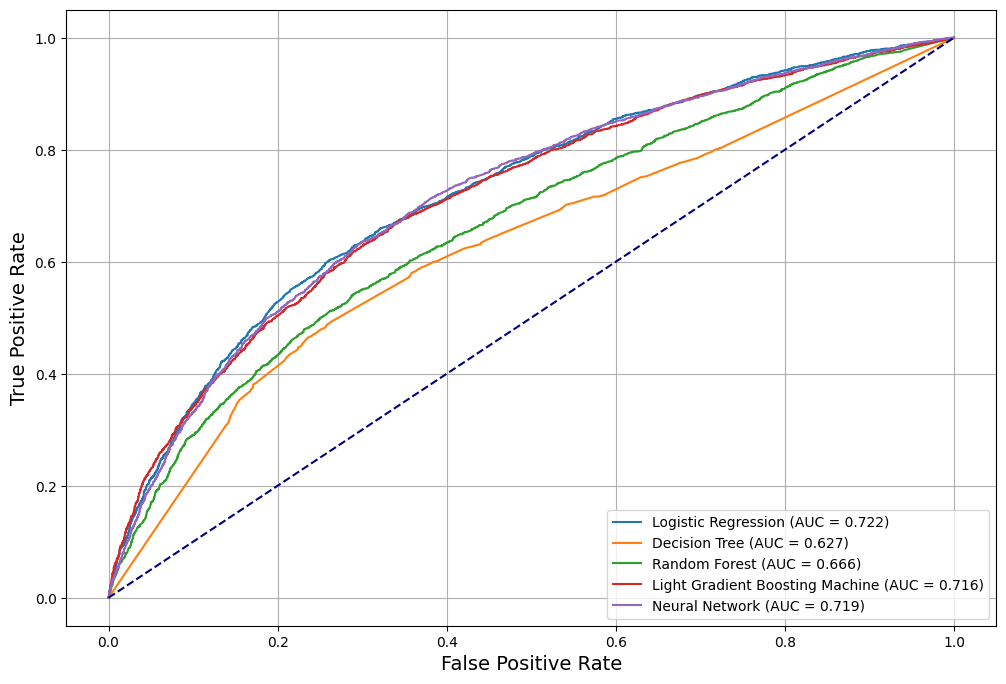

In [40]:
# Calculate ROC curve and AUC for each model
model_names = ['Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'Light Gradient Boosting Machine',
    'Neural Network']
roc_data = {}
y_probs = [log_reg_pred_proba, dt_pred_proba, rf_pred_proba, lgbm_pred_proba, nn_pred_proba]

for model_name, y_prob in zip(model_names, y_probs):
    fpr, tpr, _ = roc_curve(y, y_prob)
    auc = roc_auc_score(y, y_prob)
    roc_data[model_name] = (fpr, tpr, auc)

# Plot ROC Curves
plt.figure(figsize=(12, 8))

for model_name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')

# Plot the diagonal line (no-discrimination line)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set plot properties
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)

# Save the figure
plt.savefig('roc_curve_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

**Age**

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

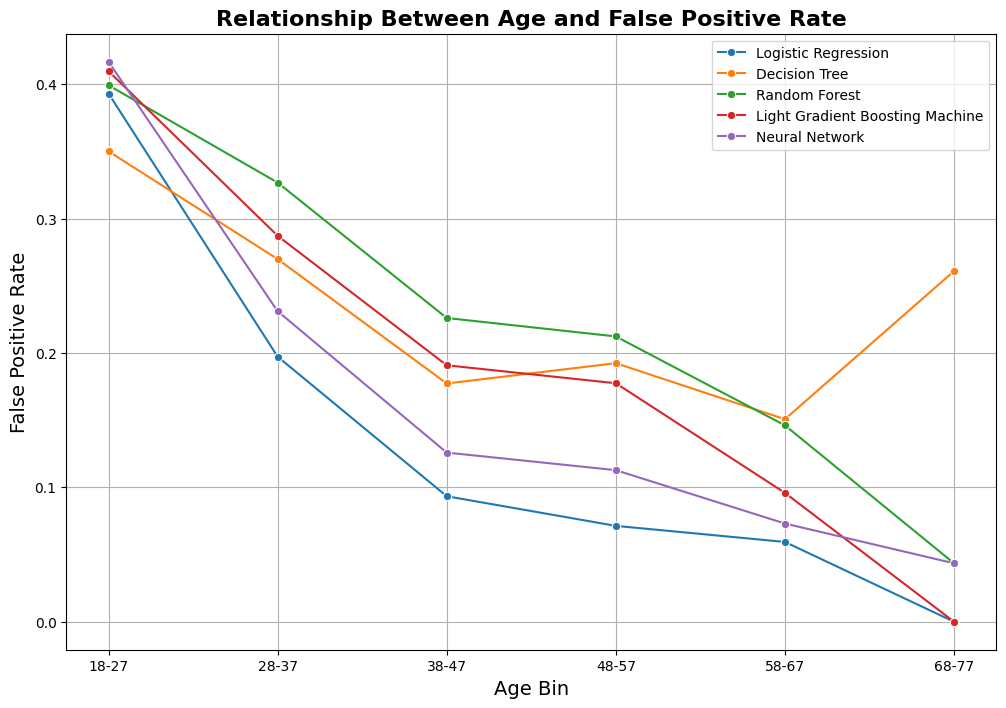

In [41]:
ages = df['age']

# Define age bins of width 10 years from 18 to 96
age_bins = list(range(18, 107, 10))  # Adjust the range to ensure it covers up to age 96
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]]
age_labels[-1] = '90-96'  # Adjust the last label
df['age_bin'] = pd.cut(ages, bins=age_bins, labels=age_labels, right=False)

# List to store FPR for each model and age bin
fpr_results = []

# Minimum number of samples required to perform k-fold cross-validation
min_samples_required = 5

# Calculate FPR for each model and age bin
for name, model in models.items():
    for label in age_labels:
        age_bin_mask = df['age_bin'] == label
        X_age_bin = X[age_bin_mask]
        y_age_bin = y[age_bin_mask]
        
        # Ensure there are enough samples in each class within the age bin
        unique, counts = np.unique(y_age_bin, return_counts=True)
        class_counts = dict(zip(unique, counts))
        
        if all(count >= min_samples_required for count in class_counts.values()):  # Ensure all classes have enough samples
            n_splits = min(len(y_age_bin), 5)
            y_pred = cross_val_predict(model, X_age_bin, y_age_bin, cv=KFold(n_splits=n_splits, shuffle=True, random_state=42))
            fpr = calculate_fpr(y_age_bin, y_pred)
            fpr_results.append({'Model': name, 'Age Bin': label, 'False Positive Rate': fpr})

# Convert results to DataFrame
df_fpr = pd.DataFrame(fpr_results)

# Plot the results
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_fpr, x='Age Bin', y='False Positive Rate', hue='Model', marker='o')
plt.title('Relationship Between Age and False Positive Rate', fontsize=16, weight='bold')
plt.xlabel('Age Bin', fontsize=14)
plt.ylabel('False Positive Rate', fontsize=14)
plt.legend()
plt.grid(True)
# Save the figure
plt.savefig('agevsfpr_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

The graph ends at 77 years old due to insufficient data with elders.

**Gener specific**

In [42]:
# Split dataset by gender
female_mask = df['sex'] == 'Female'
male_mask = df['sex'] == 'Male'

X_female = X[female_mask]
y_female = y[female_mask]

X_male = X[male_mask]
y_male = y[male_mask]

selected_models = ['Decision Tree',
    'Random Forest',
    'Light Gradient Boosting Machine']

# Filter the models dictionary to include only the selected models
filtered_models = {name: model for name, model in models.items() if name in selected_models}

# List to store metrics
metrics = []

# Evaluate models on female subset
for name, model in filtered_models.items():
    y_pred = cross_val_predict(model, X_female, y_female, cv=kf)
    accuracy = accuracy_score(y_female, y_pred)
    fpr = calculate_fpr(y_female, y_pred)
    metrics.append([f'Female - {name}', accuracy, fpr])

# Evaluate models on male subset
for name, model in filtered_models.items():
    y_pred = cross_val_predict(model, X_male, y_male, cv=kf)
    accuracy = accuracy_score(y_male, y_pred)
    fpr = calculate_fpr(y_male, y_pred)
    metrics.append([f'Male - {name}', accuracy, fpr])

# Create a DataFrame from the metrics list
df_metrics_g = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'False Positive Rate'])

# Format the numerical values to 3 decimal places
df_metrics_g['Accuracy'] = df_metrics_g['Accuracy'].apply(lambda x: f"{x:.3f}")
df_metrics_g['False Positive Rate'] = df_metrics_g['False Positive Rate'].apply(lambda x: f"{x:.3f}")

# Display the DataFrame using the display function without the index
display(df_metrics_g.style.hide(axis='index'))

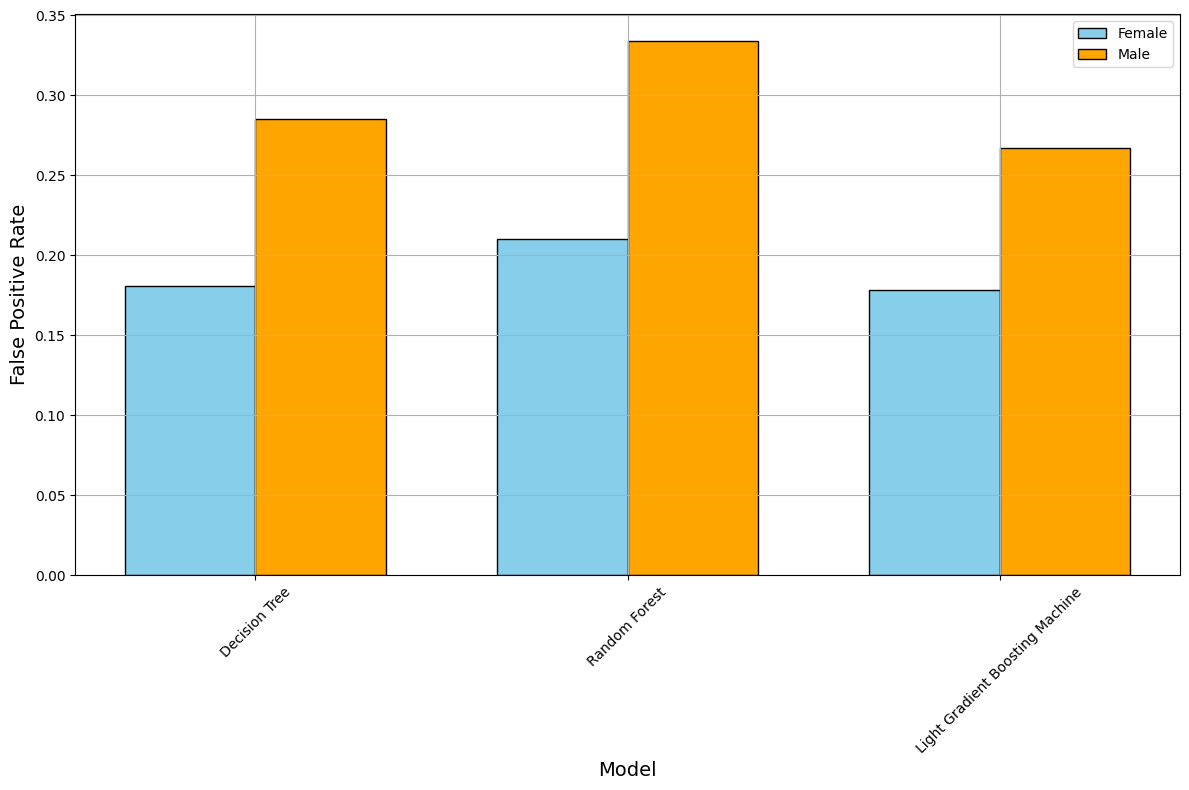

In [43]:
# Plot the comparison of false positive rates
plt.figure(figsize=(12, 8))

# Extract model names and false positive rates
model_names = df_metrics_g['Model'].apply(lambda x: x.split(' - ')[1]).unique()
fpr_female = df_metrics_g[df_metrics_g['Model'].str.contains('Female')]['False Positive Rate'].astype(float)
fpr_male = df_metrics_g[df_metrics_g['Model'].str.contains('Male')]['False Positive Rate'].astype(float)

# Create the bar plot
bar_width = 0.35
index = np.arange(len(model_names))

plt.bar(index, fpr_female, bar_width, label='Female', color='skyblue', edgecolor='black')
plt.bar(index + bar_width, fpr_male, bar_width, label='Male', color='orange', edgecolor='black')

# Add labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('False Positive Rate', fontsize=14)
plt.xticks(index + bar_width / 2, model_names, rotation=45)
plt.legend()
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('fpr_comparison_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

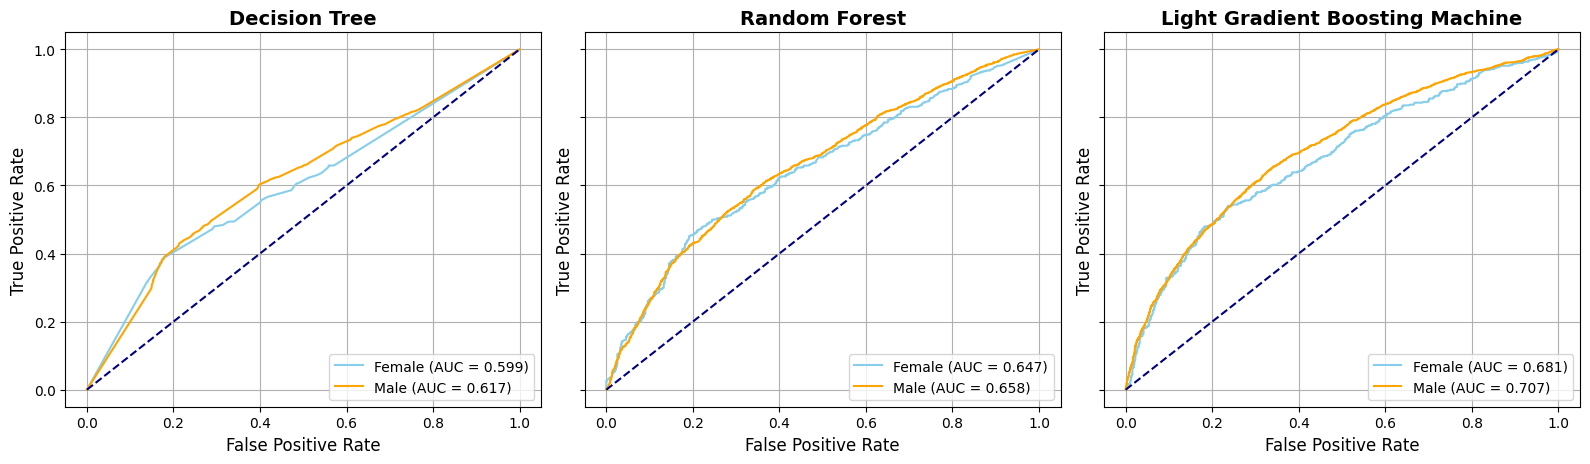

In [44]:
# Plot ROC by gender
# Dictionary to store ROC curve data
roc_data = {}

for name, model in filtered_models.items():
    # Female subset
    y_prob_female = cross_val_predict(model, X_female, y_female, cv=kf, method='predict_proba')[:, 1]
    fpr_female, tpr_female, _ = roc_curve(y_female, y_prob_female)
    auc_female = roc_auc_score(y_female, y_prob_female)
    
    # Male subset
    y_prob_male = cross_val_predict(model, X_male, y_male, cv=kf, method='predict_proba')[:, 1]
    fpr_male, tpr_male, _ = roc_curve(y_male, y_prob_male)
    auc_male = roc_auc_score(y_male, y_prob_male)
    
    roc_data[name] = {
        'female': (fpr_female, tpr_female, auc_female),
        'male': (fpr_male, tpr_male, auc_male)
    }

# Plot ROC Curves
fig, axes = plt.subplots(1, len(filtered_models), figsize=(16, 5), sharey=True)

for ax, (name, data) in zip(axes, roc_data.items()):
    fpr_female, tpr_female, auc_female = data['female']
    fpr_male, tpr_male, auc_male = data['male']
    
    ax.plot(fpr_female, tpr_female, label=f'Female (AUC = {auc_female:.3f})', color='skyblue')
    ax.plot(fpr_male, tpr_male, label=f'Male (AUC = {auc_male:.3f})', color='orange')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    
    ax.set_title(name, fontsize=14, weight='bold')
    ax.set_xlabel('False Positive Rate', fontsize=12)
    ax.set_ylabel('True Positive Rate', fontsize=12)
    ax.legend(loc='lower right')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('roc_curve_comparison_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

**Race specific**

In [45]:
# Split dataset by ethnicity
african_american_mask = df['race'] == 'African-American'
non_african_american_mask = df['race'] != 'African-American'

X_african_american = X[african_american_mask]
y_african_american = y[african_american_mask]

X_non_african_american = X[non_african_american_mask]
y_non_african_american = y[non_african_american_mask]

# List to store metrics
metrics = []

# Evaluate models on non-African-American subset
for name, model in filtered_models.items():
    y_pred = cross_val_predict(model, X_non_african_american, y_non_african_american, cv=kf)
    accuracy = accuracy_score(y_non_african_american, y_pred)
    fpr = calculate_fpr(y_non_african_american, y_pred)
    metrics.append([f'Non-African-American - {name}', accuracy, fpr])

# Evaluate models on African-American subset
for name, model in filtered_models.items():
    y_pred = cross_val_predict(model, X_african_american, y_african_american, cv=kf)
    accuracy = accuracy_score(y_african_american, y_pred)
    fpr = calculate_fpr(y_african_american, y_pred)
    metrics.append([f'African-American - {name}', accuracy, fpr])

# Create a DataFrame from the metrics list
df_metrics_r = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'False Positive Rate'])

# Format the numerical values to 3 decimal places
df_metrics_r['Accuracy'] = df_metrics_r['Accuracy'].apply(lambda x: f"{x:.3f}")
df_metrics_r['False Positive Rate'] = df_metrics_r['False Positive Rate'].apply(lambda x: f"{x:.3f}")

# Display the DataFrame using the display function without the index
display(df_metrics_r.style.hide(axis='index'))

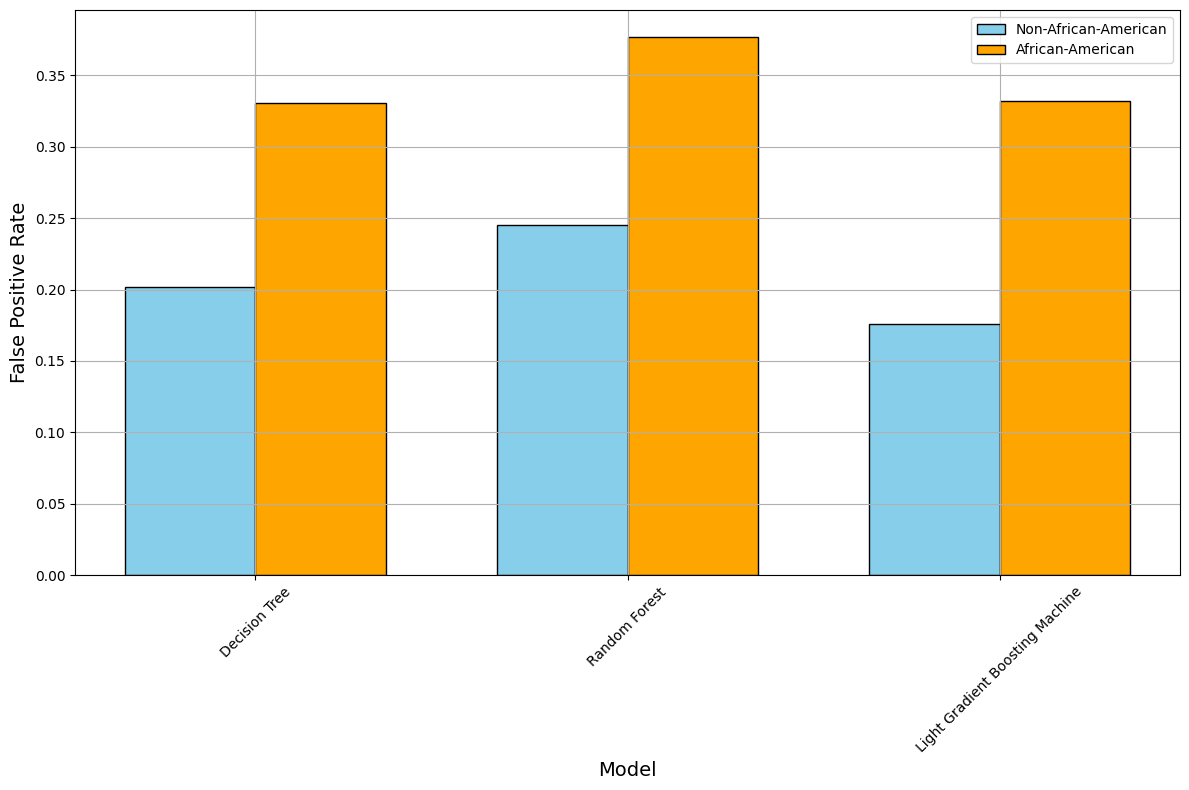

In [46]:
# Plot the comparison of false positive rates
plt.figure(figsize=(12, 8))

# Extract model names and false positive rates
model_names = df_metrics_r['Model'].apply(lambda x: x.split(' - ')[1]).unique()
fpr_non_african_american = df_metrics_r[df_metrics_r['Model'].str.contains(r'^Non-African-American - ', regex=True)]['False Positive Rate'].astype(float).reset_index(drop=True)
fpr_african_american = df_metrics_r[df_metrics_r['Model'].str.contains(r'^African-American - ', regex=True)]['False Positive Rate'].astype(float).reset_index(drop=True)

# Create the bar plot
bar_width = 0.35
index = np.arange(len(model_names))

plt.bar(index, fpr_non_african_american, bar_width, label='Non-African-American', color='skyblue', edgecolor='black')
plt.bar(index + bar_width, fpr_african_american, bar_width, label='African-American', color='orange', edgecolor='black')

# Add labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('False Positive Rate', fontsize=14)
plt.xticks(index + bar_width / 2, model_names, rotation=45)
plt.legend()
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('fpr_comparison_by_ethnicity.png', dpi=300, bbox_inches='tight')
plt.show()

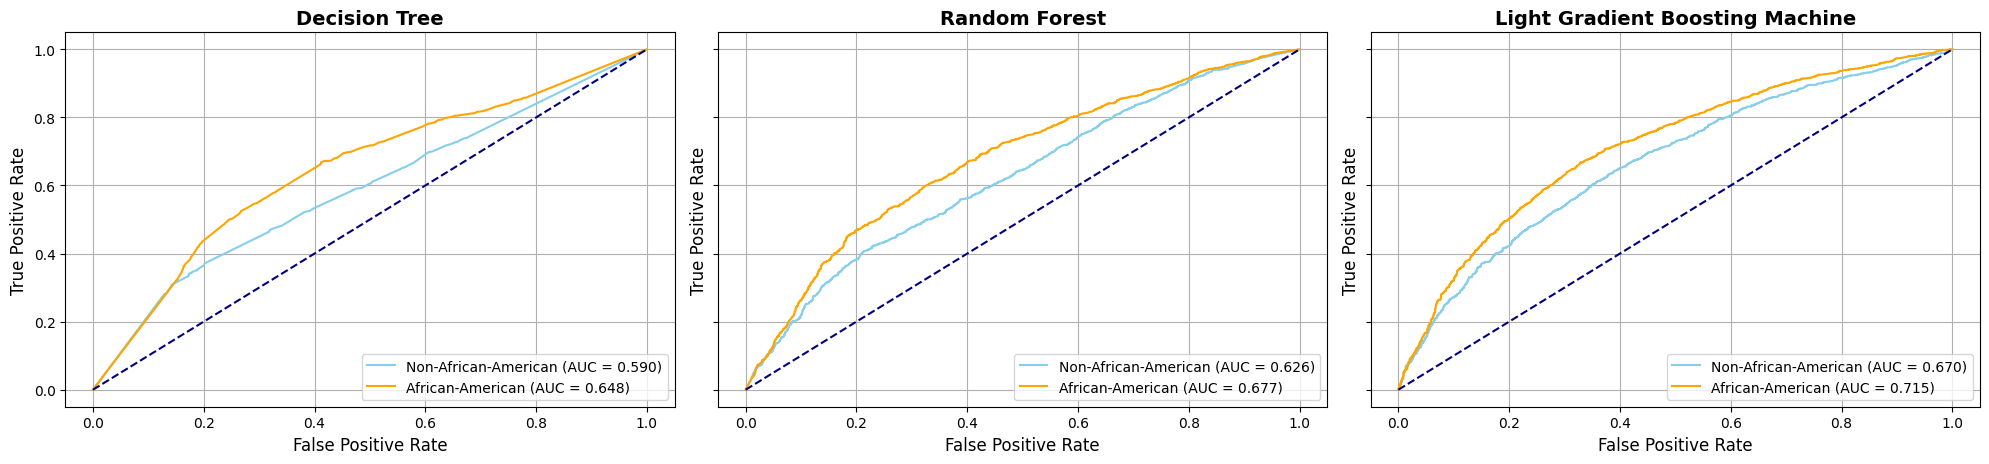

In [47]:
# Plot ROC by race
# Dictionary to store ROC curve data
roc_data = {}

for name, model in filtered_models.items():
    # Non-African-American subset
    y_prob_non_african_american = cross_val_predict(model, X_non_african_american, y_non_african_american, cv=kf, method='predict_proba')[:, 1]
    fpr_non_african_american, tpr_non_african_american, _ = roc_curve(y_non_african_american, y_prob_non_african_american)
    auc_non_african_american = roc_auc_score(y_non_african_american, y_prob_non_african_american)
    
    # African-American subset
    y_prob_african_american = cross_val_predict(model, X_african_american, y_african_american, cv=kf, method='predict_proba')[:, 1]
    fpr_african_american, tpr_african_american, _ = roc_curve(y_african_american, y_prob_african_american)
    auc_african_american = roc_auc_score(y_african_american, y_prob_african_american)
    
    roc_data[name] = {
        'non_african_american': (fpr_non_african_american, tpr_non_african_american, auc_non_african_american),
        'african_american': (fpr_african_american, tpr_african_american, auc_african_american)
    }

# Plot ROC Curves
fig, axes = plt.subplots(1, len(filtered_models), figsize=(20, 5), sharey=True)

for ax, (name, data) in zip(axes, roc_data.items()):
    fpr_non_african_american, tpr_non_african_american, auc_non_african_american = data['non_african_american']
    fpr_african_american, tpr_african_american, auc_african_american = data['african_american']

    ax.plot(fpr_non_african_american, tpr_non_african_american, label=f'Non-African-American (AUC = {auc_non_african_american:.3f})', color='skyblue')
    ax.plot(fpr_african_american, tpr_african_american, label=f'African-American (AUC = {auc_african_american:.3f})', color='orange')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    
    ax.set_title(name, fontsize=14, weight='bold')
    ax.set_xlabel('False Positive Rate', fontsize=12)
    ax.set_ylabel('True Positive Rate', fontsize=12)
    ax.legend(loc='lower right')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('roc_curve_comparison_by_race.png', dpi=300, bbox_inches='tight')
plt.show()

## log transfromation data

In [48]:
df_log.head()

sex              race  two_year_recid   log_age  log_priors   log_mis  \
0  Male             Other               0  4.248495    0.000000  0.000000   
1  Male  African-American               1  3.555348    0.000000  0.000000   
2  Male  African-American               1  3.218876    1.609438  0.000000   
3  Male  African-American               0  3.178054    0.693147  0.693147   
4  Male             Other               0  3.784190    1.098612  0.000000   

   log_fel  log_misi  log_feli  
0      0.0  0.000000       0.0  
1      0.0  0.000000       0.0  
2      0.0  0.000000       0.0  
3      0.0  4.615121       0.0  
4      0.0  0.000000       0.0

In [49]:
# Separate features and target variable
X_log = df_log.drop('two_year_recid', axis=1)
y_log = df_log['two_year_recid']

# Convert categorical variables to dummy variables
X_log = pd.get_dummies(X_log)

lmetrics=[]

In [50]:
# # Define the parameter grid for logistic regression
# param_grid_lr = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Types of penalties
#     'solver': ['liblinear', 'lbfgs'],  # Solvers
#     'max_iter': [100, 200, 500, 1000]  # Number of iterations
# }
# # Initialize GridSearchCV
# grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, n_jobs=-1, scoring='accuracy', verbose=0)

# # Perform grid search
# grid_search_lr.fit(X_log, y_log)

# # Get the best parameters
# best_params_lr = grid_search_lr.best_params_
# print("Best Parameterslr:", best_params_lr)

In [51]:
# # Define the parameter grid for Decision Trees
# param_grid_dt = {
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 10, 20],
#     'min_samples_leaf': [1, 2, 4],
#     'criterion': ['gini', 'entropy']
# }
# # Initialize GridSearchCV
# grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy', verbose=0)

# # Perform grid search
# grid_search_dt.fit(X_log, y_log)

# # Get the best parameters
# best_params_dt = grid_search_dt.best_params_
# print("Best Parametersdt:", best_params_dt)

In [52]:
# # Define the parameter grid for Random Forest
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30], # Maximum depth of the tree
#     'max_features': ['auto', 'sqrt', 'log2'], 
#     'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
# }

# # Initialize GridSearchCV with verbose=0
# grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy', verbose=0)

# # Perform grid search
# grid_search_rf.fit(X_log, y_log)

# # Get the best parameters
# best_params_rf = grid_search_rf.best_params_
# print("Best Parametersrf:", best_params_rf)

In [53]:
# # Define the parameter grid for LightGBM
# param_grid_lgb = {
#     'num_leaves': [31, 50, 70],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 200, 300]
# }

# # Initialize GridSearchCV with verbose=0
# grid_search_lgb = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgb, cv=5, n_jobs=-1, scoring='accuracy', verbose=0)

# # Perform grid search
# grid_search_lgb.fit(X_log, y_log)

# # Get the best parameters
# best_params_lgb = grid_search_lgb.best_params_
# print("Best Parameterslgb:", best_params_lgb)

In [54]:
# # Define the parameter grid for Neural Network
# param_grid_nn = {
#     'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant', 'adaptive']
# }

# # Initialize GridSearchCV with verbose=0
# grid_search_nn = GridSearchCV(estimator=nn, param_grid=param_grid_nn, cv=5, n_jobs=-1, scoring='accuracy', verbose=0)

# # Perform grid search
# grid_search_nn.fit(X_log, y_log)

# # Get the best parameters
# best_params_nn = grid_search_nn.best_params_
# print("Best Parametersnn:", best_params_nn)

log_reg: Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Best Parametersdt: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 20}

Best Parametersrf: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 300}

Best Parameterslgb: {'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 31}

Best Parametersnn: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}

In [55]:
llog_reg = LogisticRegression(C=1, max_iter=100, penalty='l1', solver='liblinear', random_state=42)
# Perform cross-validation predictions
llog_reg_pred = cross_val_predict(llog_reg, X_log, y_log, cv=kf)

llog_reg_pred_proba = cross_val_predict(llog_reg, X_log, y_log, cv=kf, method='predict_proba')[:, 1]
llog_reg_accuracy = accuracy_score(y_log, llog_reg_pred)
llog_reg_fpr = calculate_fpr(y_log, llog_reg_pred)
llog_reg_pos_precision = precision_score(y_log, llog_reg_pred, pos_label=1)
llog_reg_neg_precision = precision_score(y_log, llog_reg_pred, pos_label=0)
llog_reg_recall = recall_score(y_log, llog_reg_pred)
llog_reg_roc_auc = roc_auc_score(y_log, llog_reg_pred)
lmetrics.append([
    'Logistic Regression', llog_reg_accuracy, llog_reg_fpr, llog_reg_pos_precision,
    llog_reg_neg_precision, llog_reg_recall, llog_reg_roc_auc
])

In [56]:
ldt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2, min_samples_split=20, random_state=42)
# Perform cross-validation predictions
ldt_pred = cross_val_predict(ldt, X_log, y_log, cv=kf)

ldt_pred_proba = cross_val_predict(ldt, X_log, y_log, cv=kf, method='predict_proba')[:, 1]
ldt_accuracy = accuracy_score(y_log, ldt_pred)
ldt_fpr = calculate_fpr(y_log, ldt_pred)
ldt_pos_precision = precision_score(y_log, ldt_pred, pos_label=1)
ldt_neg_precision = precision_score(y_log, ldt_pred, pos_label=0)
ldt_recall = recall_score(y_log, ldt_pred)
ldt_roc_auc = roc_auc_score(y_log, ldt_pred_proba)
lmetrics.append([
    'Decision Tree', ldt_accuracy, ldt_fpr, ldt_pos_precision, ldt_neg_precision,
    ldt_recall, ldt_roc_auc
])

In [57]:
lrf = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf= 2, min_samples_split=20, n_estimators=300, random_state=42)
# Perform cross-validation predictions
lrf_pred = cross_val_predict(lrf, X_log, y_log, cv=kf)

lrf_pred_proba = cross_val_predict(lrf, X_log, y_log, cv=kf, method='predict_proba')[:, 1]
lrf_accuracy = accuracy_score(y_log, lrf_pred)
lrf_fpr = calculate_fpr(y_log, lrf_pred)
lrf_pos_precision = precision_score(y_log, lrf_pred, pos_label=1)
lrf_neg_precision = precision_score(y_log, lrf_pred, pos_label=0)
lrf_recall = recall_score(y_log, lrf_pred)
lrf_roc_auc = roc_auc_score(y_log, lrf_pred_proba)
lmetrics.append([
    'Random Forest', lrf_accuracy, lrf_fpr, lrf_pos_precision, lrf_neg_precision,
    lrf_recall, lrf_roc_auc
])

In [58]:
llgbm = lgb.LGBMClassifier(learning_rate=0.01, n_estimators=200, num_leaves=31, random_state=42, verbose=-1)
# Perform cross-validation predictions
llgbm_pred = cross_val_predict(llgbm, X_log, y_log, cv=kf)

llgbm_pred_proba = cross_val_predict(llgbm, X_log, y_log, cv=kf, method='predict_proba')[:, 1]
llgbm_accuracy = accuracy_score(y_log, llgbm_pred)
llgbm_fpr = calculate_fpr(y_log, llgbm_pred)
llgbm_pos_precision = precision_score(y_log, llgbm_pred, pos_label=1)
llgbm_neg_precision = precision_score(y_log, llgbm_pred, pos_label=0)
llgbm_recall = recall_score(y_log, llgbm_pred)
llgbm_roc_auc = roc_auc_score(y_log, llgbm_pred_proba)
lmetrics.append([
    'Light Gradient Boosting Machine', llgbm_accuracy, llgbm_fpr, llgbm_pos_precision,
    llgbm_neg_precision, llgbm_recall, llgbm_roc_auc
])

In [59]:
lnn = MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate='constant', solver='sgd')
# Perform cross-validation predictions
lnn_pred = cross_val_predict(lnn, X_log, y_log, cv=kf)

lnn_pred_proba = cross_val_predict(lnn, X_log, y_log, cv=kf, method='predict_proba')[:, 1]
lnn_accuracy = accuracy_score(y_log, lnn_pred)
lnn_fpr = calculate_fpr(y_log, lnn_pred)
lnn_pos_precision = precision_score(y_log, lnn_pred, pos_label=1)
lnn_neg_precision = precision_score(y_log, lnn_pred, pos_label=0)
lnn_recall = recall_score(y_log, lnn_pred)
lnn_roc_auc = roc_auc_score(y_log, lnn_pred_proba)
lmetrics.append([
    'Neural Network', lnn_accuracy, lnn_fpr, lnn_pos_precision, lnn_neg_precision,
    lnn_recall, lnn_roc_auc
])

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptro

In [60]:
# Create a DataFrame from the metrics list
df_lmetrics = pd.DataFrame(lmetrics, columns=['Model', 'Accuracy', 'False Positive Rate',
                                           'Positive Precision', 'Negative Precision', 
                                            'Recall (Sensitivity)', 'ROC AUC'])

# Format the numerical values to 3 decimal places
df_lmetrics['Accuracy'] = df_lmetrics['Accuracy'].apply(lambda x: f"{x:.3f}")
df_lmetrics['False Positive Rate'] = df_lmetrics['False Positive Rate'].apply(lambda x: f"{x:.3f}")
df_lmetrics['Positive Precision'] = df_lmetrics['Positive Precision'].apply(lambda x: f"{x:.3f}")
df_lmetrics['Negative Precision'] = df_lmetrics['Negative Precision'].apply(lambda x: f"{x:.3f}")
df_lmetrics['Recall (Sensitivity)'] = df_lmetrics['Recall (Sensitivity)'].apply(lambda x: f"{x:.3f}")
df_lmetrics['ROC AUC'] = df_lmetrics['ROC AUC'].apply(lambda x: f"{x:.3f}")

# Display the styled DataFrame
display(df_lmetrics.style.hide(axis='index'))

Decision Tree Random Forest Lgbm nueral network Performance imporved after fine tune and log transformation. So for fairness will only compute these three models.

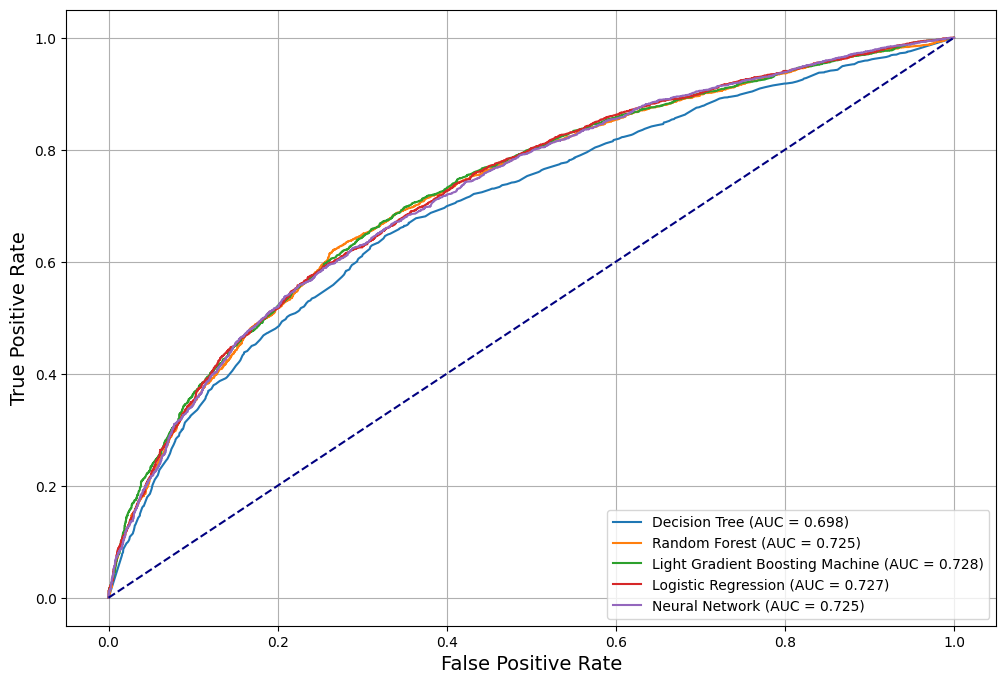

In [61]:
# Calculate ROC curve and AUC for each model
lmodel_names = ['Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'Light Gradient Boosting Machine',
    'Neural Network']
lroc_data = {}
ly_probs = [llog_reg_pred_proba, ldt_pred_proba, lrf_pred_proba, llgbm_pred_proba, lnn_pred_proba]

for lmodel_name, ly_prob in zip(lmodel_names, ly_probs):
    fpr, tpr, _ = roc_curve(y_log, ly_prob)
    auc = roc_auc_score(y_log, ly_prob)
    roc_data[lmodel_name] = (fpr, tpr, auc)

# Plot ROC Curves
plt.figure(figsize=(12, 8))

for lmodel_name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{lmodel_name} (AUC = {auc:.3f})')

# Plot the diagonal line (no-discrimination line)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set plot properties
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)

# Save the figure
plt.savefig('roc_curve_comparison_improved.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [62]:
# Train models on the whole dataset
lmodels = {
    'Decision Tree': ldt,
    'Random Forest': lrf,
    'Light Gradient Boosting Machine': llgbm,
    'Neural Network': lnn
}

for name, model in lmodels.items():
    model.fit(X_log, y_log)

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [63]:
# Split dataset by gender
lfemale_mask = df_log['sex'] == 'Female'
lmale_mask = df_log['sex'] == 'Male'

X_female_log = X_log[lfemale_mask]
y_female_log = y_log[lfemale_mask]

X_male_log = X_log[lmale_mask]
y_male_log = y_log[lmale_mask]

# List to store metrics
lgmetrics = []

# Evaluate models on female subset
for name, model in lmodels.items():
    y_pred = cross_val_predict(model, X_female_log, y_female_log, cv=kf)
    accuracy = accuracy_score(y_female_log, y_pred)
    fpr = calculate_fpr(y_female_log, y_pred)
    lgmetrics.append([f'Female - {name}', accuracy, fpr])

# Evaluate models on male subset
for name, model in lmodels.items():
    y_pred = cross_val_predict(model, X_male_log, y_male_log, cv=kf)
    accuracy = accuracy_score(y_male_log, y_pred)
    fpr = calculate_fpr(y_male_log, y_pred)
    lgmetrics.append([f'Male - {name}', accuracy, fpr])

# Create a DataFrame from the metrics list
df_metrics_lg = pd.DataFrame(lgmetrics, columns=['Model', 'Accuracy', 'False Positive Rate'])

# Format the numerical values to 3 decimal places
df_metrics_lg['Accuracy'] = df_metrics_lg['Accuracy'].apply(lambda x: f"{x:.3f}")
df_metrics_lg['False Positive Rate'] = df_metrics_lg['False Positive Rate'].apply(lambda x: f"{x:.3f}")

# Display the DataFrame using the display function without the index
display(df_metrics_lg.style.hide(axis='index'))

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


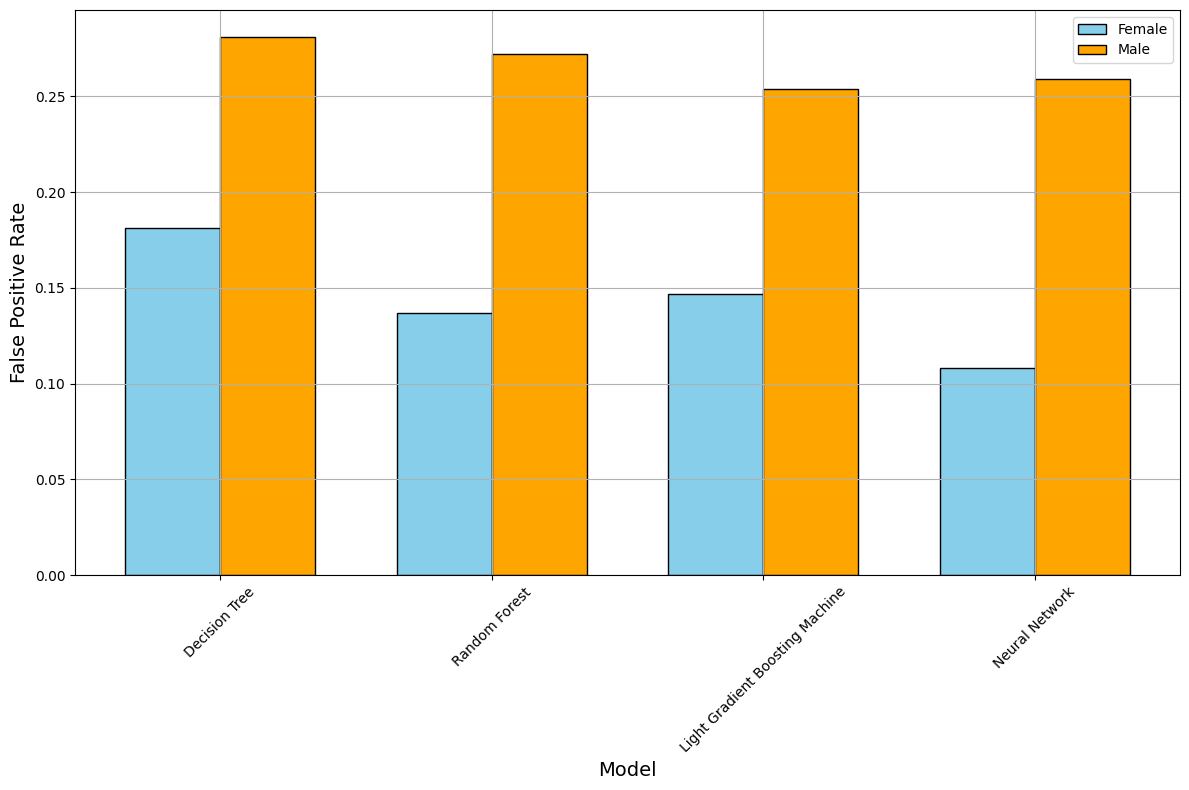

In [64]:
# Plot the comparison of false positive rates
plt.figure(figsize=(12, 8))

# Extract model names and false positive rates
model_names = df_metrics_lg['Model'].apply(lambda x: x.split(' - ')[1]).unique()
fpr_female = df_metrics_lg[df_metrics_lg['Model'].str.contains('Female')]['False Positive Rate'].astype(float)
fpr_male = df_metrics_lg[df_metrics_lg['Model'].str.contains('Male')]['False Positive Rate'].astype(float)

# Create the bar plot
bar_width = 0.35
index = np.arange(len(model_names))

plt.bar(index, fpr_female, bar_width, label='Female', color='skyblue', edgecolor='black')
plt.bar(index + bar_width, fpr_male, bar_width, label='Male', color='orange', edgecolor='black')

# Add labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('False Positive Rate', fontsize=14)
plt.xticks(index + bar_width / 2, model_names, rotation=45)
plt.legend()
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('lfpr_comparison_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

The differency between female and male in RF and LGBM in FPR increase, so indicate bias and unfair integrate as trade off of accuracy.

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptro

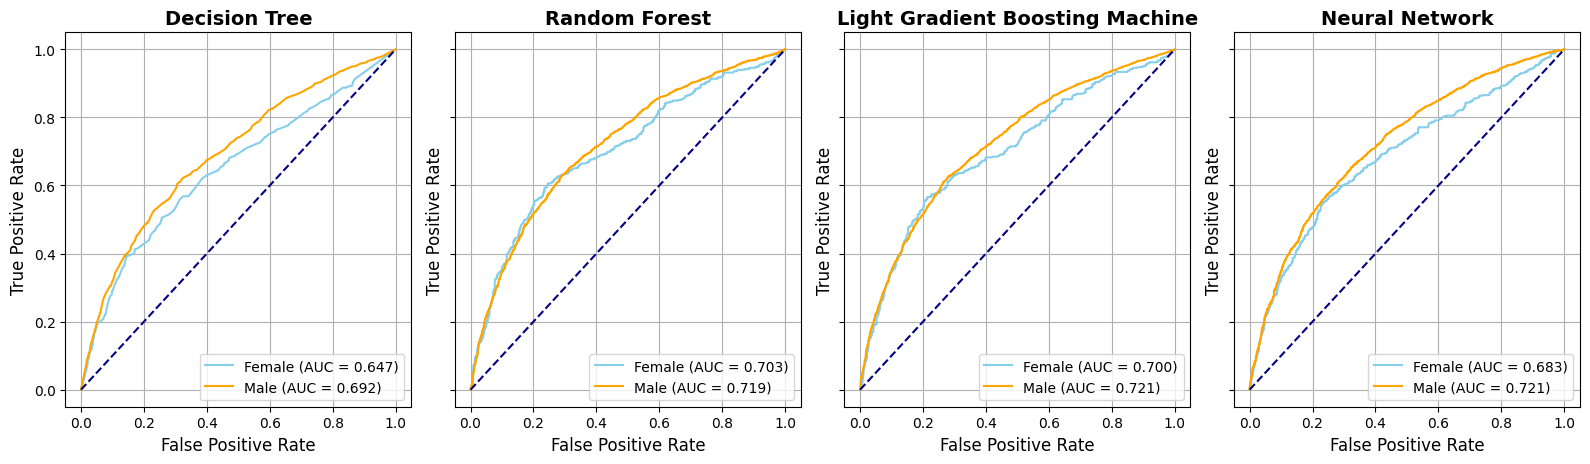

In [65]:
# Plot ROC by gender
# Dictionary to store ROC curve data
roc_data = {}

for name, model in lmodels.items():
    # Female subset
    y_prob_female = cross_val_predict(model, X_female_log, y_female_log, cv=kf, method='predict_proba')[:, 1]
    fpr_female, tpr_female, _ = roc_curve(y_female_log, y_prob_female)
    auc_female = roc_auc_score(y_female_log, y_prob_female)
    
    # Male subset
    y_prob_male = cross_val_predict(model, X_male_log, y_male_log, cv=kf, method='predict_proba')[:, 1]
    fpr_male, tpr_male, _ = roc_curve(y_male_log, y_prob_male)
    auc_male = roc_auc_score(y_male_log, y_prob_male)
    
    roc_data[name] = {
        'female': (fpr_female, tpr_female, auc_female),
        'male': (fpr_male, tpr_male, auc_male)
    }

# Plot ROC Curves
fig, axes = plt.subplots(1, len(lmodels), figsize=(16, 5), sharey=True)

for ax, (name, data) in zip(axes, roc_data.items()):
    fpr_female, tpr_female, auc_female = data['female']
    fpr_male, tpr_male, auc_male = data['male']
    
    ax.plot(fpr_female, tpr_female, label=f'Female (AUC = {auc_female:.3f})', color='skyblue')
    ax.plot(fpr_male, tpr_male, label=f'Male (AUC = {auc_male:.3f})', color='orange')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    
    ax.set_title(name, fontsize=14, weight='bold')
    ax.set_xlabel('False Positive Rate', fontsize=12)
    ax.set_ylabel('True Positive Rate', fontsize=12)
    ax.legend(loc='lower right')
    ax.grid(True)
    
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('lroc_curve_comparison_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

In [66]:
# Split dataset by ethnicity
lafrican_american_mask = df_log['race'] == 'African-American'
lnon_african_american_mask = df_log['race'] != 'African-American'

X_african_american_log = X_log[lafrican_american_mask]
y_african_american_log = y_log[lafrican_american_mask]

X_non_african_american_log = X_log[lnon_african_american_mask]
y_non_african_american_log = y_log[lnon_african_american_mask]

# List to store metrics
lrmetrics = []

# Evaluate models on non-African-American subset
for name, model in lmodels.items():
    y_pred = cross_val_predict(model, X_non_african_american_log, y_non_african_american_log, cv=kf)
    accuracy = accuracy_score(y_non_african_american_log, y_pred)
    fpr = calculate_fpr(y_non_african_american_log, y_pred)
    lrmetrics.append([f'Non-African-American - {name}', accuracy, fpr])

# Evaluate models on African-American subset
for name, model in lmodels.items():
    y_pred = cross_val_predict(model, X_african_american_log, y_african_american_log, cv=kf)
    accuracy = accuracy_score(y_african_american_log, y_pred)
    fpr = calculate_fpr(y_african_american_log, y_pred)
    lrmetrics.append([f'African-American - {name}', accuracy, fpr])

# Create a DataFrame from the metrics list
df_metrics_lr = pd.DataFrame(lrmetrics, columns=['Model', 'Accuracy', 'False Positive Rate'])

# Format the numerical values to 3 decimal places
df_metrics_lr['Accuracy'] = df_metrics_lr['Accuracy'].apply(lambda x: f"{x:.3f}")
df_metrics_lr['False Positive Rate'] = df_metrics_lr['False Positive Rate'].apply(lambda x: f"{x:.3f}")

# Display the DataFrame using the display function without the index
display(df_metrics_lr.style.hide(axis='index'))

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptro

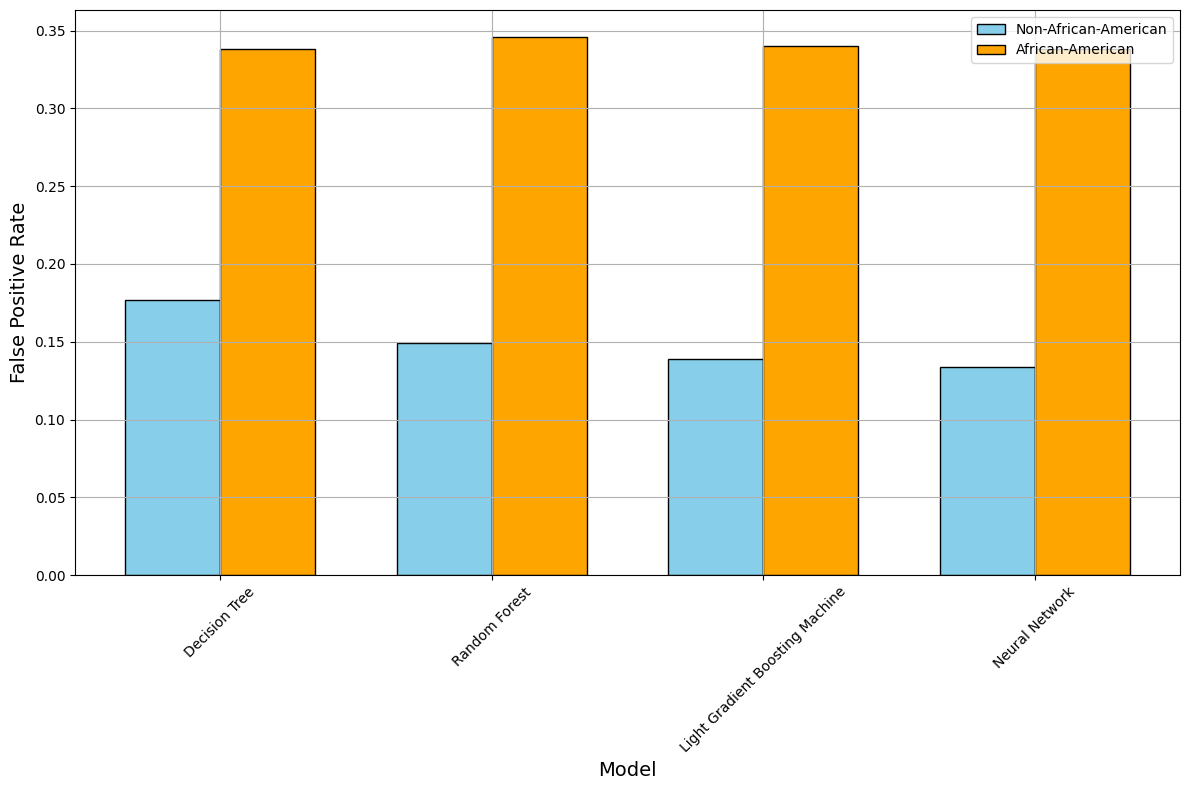

In [67]:
# Plot the comparison of false positive rates
plt.figure(figsize=(12, 8))

# Extract model names and false positive rates
model_names = df_metrics_lr['Model'].apply(lambda x: x.split(' - ')[1]).unique()
fpr_non_african_american = df_metrics_lr[df_metrics_lr['Model'].str.contains(r'^Non-African-American - ', regex=True)]['False Positive Rate'].astype(float).reset_index(drop=True)
fpr_african_american = df_metrics_lr[df_metrics_lr['Model'].str.contains(r'^African-American - ', regex=True)]['False Positive Rate'].astype(float).reset_index(drop=True)

# Create the bar plot
bar_width = 0.35
index = np.arange(len(model_names))

plt.bar(index, fpr_non_african_american, bar_width, label='Non-African-American', color='skyblue', edgecolor='black')
plt.bar(index + bar_width, fpr_african_american, bar_width, label='African-American', color='orange', edgecolor='black')

# Add labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('False Positive Rate', fontsize=14)
plt.xticks(index + bar_width / 2, model_names, rotation=45)
plt.legend()
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('lfpr_comparison_by_ethnicity.png', dpi=300, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptro

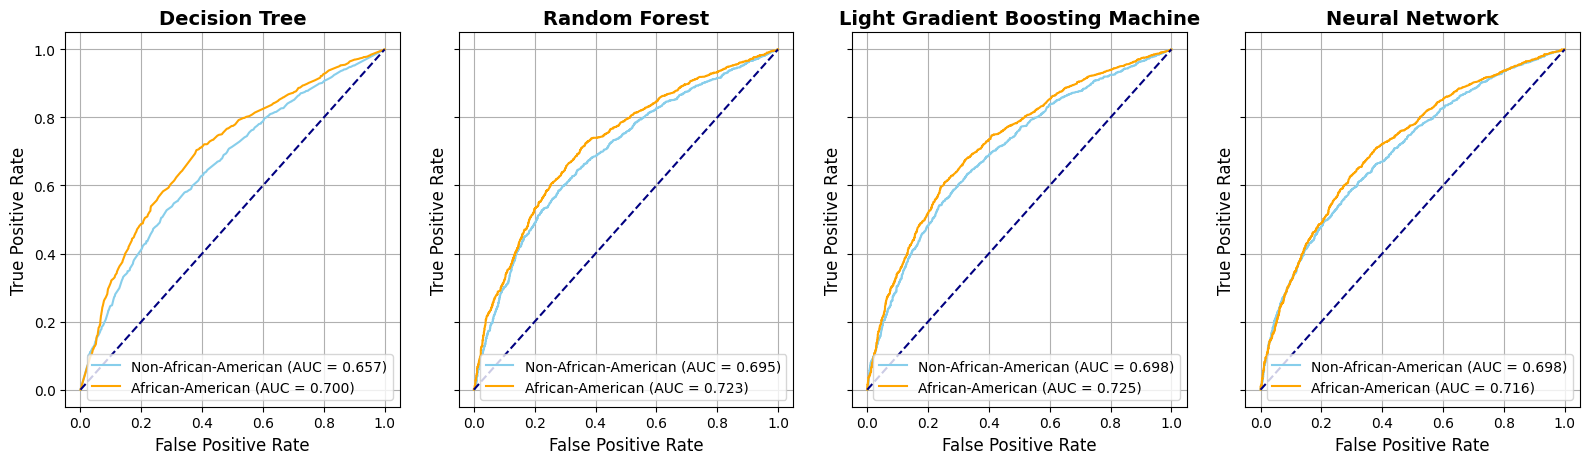

In [68]:
# Plot ROC by race
# Dictionary to store ROC curve data
roc_data = {}

for name, model in lmodels.items():
    # Non-African-American subset
    y_prob_non_african_american = cross_val_predict(model, X_non_african_american_log, y_non_african_american_log, cv=kf, method='predict_proba')[:, 1]
    fpr_non_african_american, tpr_non_african_american, _ = roc_curve(y_non_african_american_log, y_prob_non_african_american)
    auc_non_african_american = roc_auc_score(y_non_african_american_log, y_prob_non_african_american)
    
    # African-American subset
    y_prob_african_american = cross_val_predict(model, X_african_american_log, y_african_american_log, cv=kf, method='predict_proba')[:, 1]
    fpr_african_american, tpr_african_american, _ = roc_curve(y_african_american_log, y_prob_african_american)
    auc_african_american = roc_auc_score(y_african_american_log, y_prob_african_american)
    
    roc_data[name] = {
        'non_african_american': (fpr_non_african_american, tpr_non_african_american, auc_non_african_american),
        'african_american': (fpr_african_american, tpr_african_american, auc_african_american)
    }

# Plot ROC Curves
fig, axes = plt.subplots(1, len(lmodels), figsize=(16, 5), sharey=True)

for ax, (name, data) in zip(axes, roc_data.items()):
    fpr_non_african_american, tpr_non_african_american, auc_non_african_american = data['non_african_american']
    fpr_african_american, tpr_african_american, auc_african_american = data['african_american']

    ax.plot(fpr_non_african_american, tpr_non_african_american, label=f'Non-African-American (AUC = {auc_non_african_american:.3f})', color='skyblue')
    ax.plot(fpr_african_american, tpr_african_american, label=f'African-American (AUC = {auc_african_american:.3f})', color='orange')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    
    ax.set_title(name, fontsize=14, weight='bold')
    ax.set_xlabel('False Positive Rate', fontsize=12)
    ax.set_ylabel('True Positive Rate', fontsize=12)
    ax.legend(loc='lower right')
    ax.grid(True)
    
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('lroc_curve_comparison_by_race.png', dpi=300, bbox_inches='tight')
plt.show()

**SHAP**

In [69]:
import shap
import joblib

from IPython.display import display, HTML

# Calculate SHAP values using TreeExplainer
explainer = shap.TreeExplainer(llgbm)
shap_values = explainer.shap_values(X_log)

# Summary plot of important features
print("Summary plot for LightGBM")
shap.summary_plot(shap_values, X_log, feature_names=X_log.columns, show=False)  # Add show=False
plt.tight_layout()
plt.savefig('shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.close()

/usr/local/lib/python3.11/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


Summary plot for LightGBM


In [70]:
# Nonlinear effect plot for a specific feature (e.g., 'age')
feature = 'log_priors'  # Replace with the feature you are interested in
print(f"Dependence plot for LightGBM - Feature: '{feature}'")
shap.dependence_plot(feature, shap_values, X_log, feature_names=X_log.columns, show=False)
plt.tight_layout()
plt.savefig(f'shap_dependence_plot_{feature}.png', dpi=300, bbox_inches='tight')
plt.close()

Dependence plot for LightGBM - Feature: 'log_priors'


In [71]:
# Nonlinear effect plot for a specific feature (e.g., 'age')
feature = 'sex_Female'  # Replace with the feature you are interested in
print(f"Dependence plot for LightGBM - Feature: '{feature}'")
shap.dependence_plot(feature, shap_values, X_log, feature_names=X_log.columns, show=False)
plt.tight_layout()
plt.savefig(f'shap_dependence_plot_{feature}.png', dpi=300, bbox_inches='tight')
plt.close()

Dependence plot for LightGBM - Feature: 'sex_Female'


In [78]:
# Nonlinear effect plot for a specific feature (e.g., 'age')
feature = 'race_African-American'  # Replace with the feature you are interested in
print(f"Dependence plot for LightGBM - Feature: '{feature}'")
shap.dependence_plot(feature, shap_values, X_log, feature_names=X_log.columns, show=False)
plt.tight_layout()
plt.savefig(f'shap_dependence_plot_{feature}.png', dpi=300, bbox_inches='tight')
plt.close()

Dependence plot for LightGBM - Feature: 'race_African-American'


In [72]:
# Individualized explanation plot for a specific instance
instance_index = 0
print(f"Force plot for LightGBM - Instance: {instance_index}")
shap.initjs()
force_plot = shap.force_plot(explainer.expected_value, shap_values[instance_index, :], X_log.iloc[instance_index, :], 
                             feature_names=X_log.columns)
shap.save_html('shap_force_plot_instance_0%.html', force_plot)
display(force_plot)

Force plot for LightGBM - Instance: 0


In [73]:
instance_index = 1443
print(f"Force plot for LightGBM - Instance: {instance_index}")
shap.initjs()
force_plot = shap.force_plot(explainer.expected_value, shap_values[instance_index, :], X_log.iloc[instance_index, :], 
                             feature_names=X_log.columns)
shap.save_html('shap_force_plot_instance_20%.html', force_plot)
display(force_plot)

Force plot for LightGBM - Instance: 1443


In [74]:
instance_index = 2886
print(f"Force plot for LightGBM - Instance: {instance_index}")
shap.initjs()
force_plot = shap.force_plot(explainer.expected_value, shap_values[instance_index, :], X_log.iloc[instance_index, :], 
                             feature_names=X_log.columns)
shap.save_html('shap_force_plot_instance_40%.html', force_plot)
display(force_plot)

Force plot for LightGBM - Instance: 2886


In [75]:
instance_index = 4328
print(f"Force plot for LightGBM - Instance: {instance_index}")
shap.initjs()
force_plot = shap.force_plot(explainer.expected_value, shap_values[instance_index, :], X_log.iloc[instance_index, :], 
                             feature_names=X_log.columns)
shap.save_html('shap_force_plot_instance_60%.html', force_plot)
display(force_plot)

Force plot for LightGBM - Instance: 4328


In [76]:
instance_index = 5771
print(f"Force plot for LightGBM - Instance: {instance_index}")
shap.initjs()
force_plot = shap.force_plot(explainer.expected_value, shap_values[instance_index, :], X_log.iloc[instance_index, :], 
                             feature_names=X_log.columns)
shap.save_html('shap_force_plot_instance_80%.html', force_plot)
display(force_plot)

Force plot for LightGBM - Instance: 5771


In [77]:
instance_index = 7213
print(f"Force plot for LightGBM - Instance: {instance_index}")
shap.initjs()
force_plot = shap.force_plot(explainer.expected_value, shap_values[instance_index, :], X_log.iloc[instance_index, :], 
                             feature_names=X_log.columns)
shap.save_html('shap_force_plot_instance_100%.html', force_plot)
display(force_plot)

Force plot for LightGBM - Instance: 7213
